<a href="https://colab.research.google.com/github/Schimidel/UGRH-s-PrecipitacaoeTemperatura/blob/main/Proje%C3%A7%C3%B5es_Futuras_Precipita%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Informações da UGRH Paraná

Importância: Região com maior demanda por recursos hídricos do país, já que abrange os estados de maior desenvolvimento econômico (ANA, 2015)

Abrange os estados de Mato Grosso do Sul, Paraná e São Paulo.
População estimada dos estados: População: SP - 44.411.238 pessoas, MTS - 2.757.013 pessoas, PR-  11.444.380 pessoas.(Fonte: https://censo2022.ibge.gov.br/panorama/)

Produção Agropecuária Predominante dos estados:
MTS→ Soja, Milho, Cana, Mandioca, Algodão, Galináceos, Bovinos, Suínos.
SP - Cana, Soja, Laranja, Milho em grão, Café, Galináceos, Bovinos.
PR- Soja, Milho, Trigo, Cana, Mandioca, Galináceos.
Fonte(https://www.ibge.gov.br/explica/producao-agropecuaria/sp)

Biomas: Cerrado e Mata Atlântica: Fonte(https://geoftp.ibge.gov.br/informacoes_ambientais/estudos_ambientais/biomas/mapas/biomas_e_sistema_costeiro_marinho_250mil.pdf)

##Mudanças históricas e projeções.
Impacto Ambiental que está sofrendo: Paraná- 1961 a 2008: aquecimento de 1,33° C no índice mínimo anual, de 0,83° C no médio e de 0,33°C no máximo, enquanto que a pluviometria não mostrou tendência significativa de alteração.

A Bacia Hidrográfica do Rio Paraná, que drena os estados do Sul do Brasil e parte do Paraguai, tem apresentado importante aumento de vazão nas últimas décadas.

A vazão nessa bacia aumentou aproximadamente 15% desde a década de 1960, o que é consistente com os crescentes valores de volume de precipitação nela observados.

Até meados do século XXI, a Bacia Hidrográfica dos rios Paraná e da Prata deverá aumentar sua vazão entre 10% e 40% no cenário A1B do IPCC.

Artigo: Changes in precipitation extremes in Brazil (Fonte: https://link.springer.com/article/10.1007/s00704-015-1391-4)

Bacia do Rio Paraná: 1986 a 2011 - Tendências crescentes nas quantidades de precipitação foram significativas. Embora não exista um padrão espacial na distribuição destas tendências, é evidente que, numa grande parte da bacia, existem tendências positivas na precipitação total anual, e este aumento está relacionado principalmente com precipitações mais intensas.


Artigo: Climate change impacts on South American water balance from a continental-scale hydrological model driven by CMIP5 projections. Fonte(https://link.springer.com/article/10.1007/s10584-020-02667-9)
Tendência negativas na vazão devido a bacia do paraguai, embora não estatiscamente significativo. A Bacia do Paraná é uma região de transição onde a área a montante deverá se tornar mais seca e a área a jusante mais úmida.



Dados Conjuntura dos Recursos Hídricos no Brasil 2021
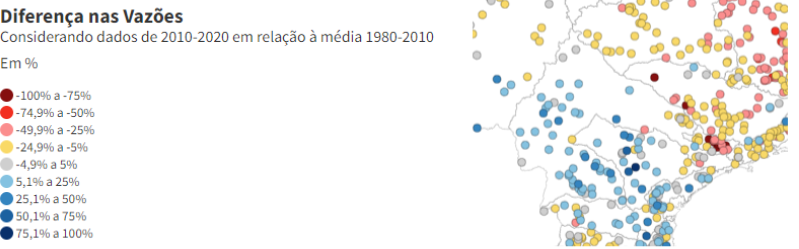

In [ ]:
%%capture

!pip install -U xarray[complete] # reinstala todo o xarray (útil nessa versão do colab por conta do cftime)

!pip install cartopy # Instala o cartopy


#Análise Geral. Tendência geral das precipitações dos modelos até 2100.
Comparação dos modelos cenários com os modelos históricos

In [ ]:
#Importa as bibliotecas
import xarray as xr #Biblioteca para netcdf
import numpy as np
import requests #Biblioteca para fazer download direto do link htlm
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.crs as ccrs #Biblioteca de criação de mapas
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from scipy import stats
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Converte o grid de 0x360 lon para -180x180
def change_coords(ds):
  ds.coords['longitude'] = (ds.coords['longitude'] + 180) % 360 - 180
  ds = ds.sortby(ds.longitude)
  return ds

### Download dados.

In [ ]:
import xarray

In [ ]:
output_dir = '/content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados'

#Arquivos históricos
CCSM4 = xr.open_dataset(f'{output_dir}/CCSM4_pr.nc')
ACCESS1_3 = xr.open_dataset(f'{output_dir}/ACCESS1-3_pr.nc')
HadGEM2_ES = xr.open_dataset(f'{output_dir}/HadGEM2-ES_pr.nc')

#Arquivos rcp4.5
CCSM4_rcp45 = xr.open_dataset(f'{output_dir}/RCP45-CCSM4_pr.nc')
ACCESS1_3_rcp45 = xr.open_dataset(f'{output_dir}/RCP45-ACCESS1-3_pr.nc')
HadGEM2_ES_rcp45 = xr.open_dataset(f'{output_dir}/RCP45-HadGEM2-ES_pr.nc')

#Arquivos rcp8.5
CCSM4_rcp85 = xr.open_dataset(f'{output_dir}/RCP85-CCSM4_pr.nc')
ACCESS1_3_rcp85 = xr.open_dataset(f'{output_dir}/RCP85-ACCESS1-3_pr.nc')
HadGEM2_ES_rcp85 = xr.open_dataset(f'{output_dir}/RCP85-HadGEM2-ES_pr.nc')

In [ ]:
# Média anual para cada ano
CCSM4_yrmean = CCSM4.groupby('time.year').sum('time')
ACCESS1_3_yrmean = ACCESS1_3.groupby('time.year').sum('time')
HadGEM2_ES_yrmean = HadGEM2_ES.groupby('time.year').sum('time')

CCSM4_rcp45_yrmean = CCSM4_rcp45.groupby('time.year').sum('time')
ACCESS1_3_rcp45_yrmean = ACCESS1_3_rcp45.groupby('time.year').sum('time')
HadGEM2_ES_rcp45_yrmean = HadGEM2_ES_rcp45.groupby('time.year').sum('time')

CCSM4_rcp85_yrmean = CCSM4_rcp85.groupby('time.year').sum('time')
ACCESS1_3_rcp85_yrmean = ACCESS1_3_rcp85.groupby('time.year').sum('time')
HadGEM2_ES_rcp85_yrmean = HadGEM2_ES_rcp85.groupby('time.year').sum('time')

In [ ]:
#Calcula a média climátológica definida para 30 anos.
mean_CCSM4 = CCSM4_yrmean.sel(year=slice("1975", "2004")).mean(dim='year')
mean_ACCESS1_3 = ACCESS1_3_yrmean.sel(year=slice("1975", "2004")).mean(dim='year')
mean_HadGEM2_ES = HadGEM2_ES_yrmean.sel(year=slice("1975", "2004")).mean(dim='year')

In [ ]:
#Calcula as anomalias
anom_CCSM4 = CCSM4_yrmean - mean_CCSM4
anom_ACCESS1_3 = ACCESS1_3_yrmean- mean_ACCESS1_3
anom_HadGEM2_ES = HadGEM2_ES_yrmean - mean_HadGEM2_ES

anom_CCSM4_rcp45 = CCSM4_rcp45_yrmean - mean_CCSM4
anom_ACCESS1_3_rcp45 = ACCESS1_3_rcp45_yrmean - mean_ACCESS1_3
anom_HadGEM2_ES_rcp45 = HadGEM2_ES_rcp45_yrmean - mean_HadGEM2_ES

anom_CCSM4_rcp85 = CCSM4_rcp85_yrmean - mean_CCSM4
anom_ACCESS1_3_rcp85 = ACCESS1_3_rcp85_yrmean - mean_ACCESS1_3
anom_HadGEM2_ES_rcp85 = HadGEM2_ES_rcp85_yrmean - mean_HadGEM2_ES

In [ ]:
#Seleciona só até 2004 os dados historicos, pois eles vão até 2005-12 e os dados do rcp85 começam em 2005-01
anom_CCSM4 = anom_CCSM4.sel(year=slice("1851", "2004"))
anom_ACCESS1_3 = anom_ACCESS1_3.sel(year=slice("1851", "2004"))
anom_HadGEM2_ES = anom_HadGEM2_ES.sel(year=slice("1851", "2004"))

anom_CCSM4_rcp45 = anom_CCSM4_rcp45.sel(year=slice("2007", "2100"))
anom_ACCESS1_3_rcp45 = anom_ACCESS1_3_rcp45.sel(year=slice("2007", "2100"))
anom_HadGEM2_ES_rcp45 = anom_HadGEM2_ES_rcp45.sel(year=slice("2007", "2100"))

anom_CCSM4_rcp85 = anom_CCSM4_rcp85.sel(year=slice("2007", "2100"))
anom_ACCESS1_3_rcp85 = anom_ACCESS1_3_rcp85.sel(year=slice("2007", "2100"))
anom_HadGEM2_ES_rcp85 = anom_HadGEM2_ES_rcp85.sel(year=slice("2007", "2100"))

Plotagem de tendência linear das anomalias de precipitação da a bacia, dados futuros em relação a média histórica!

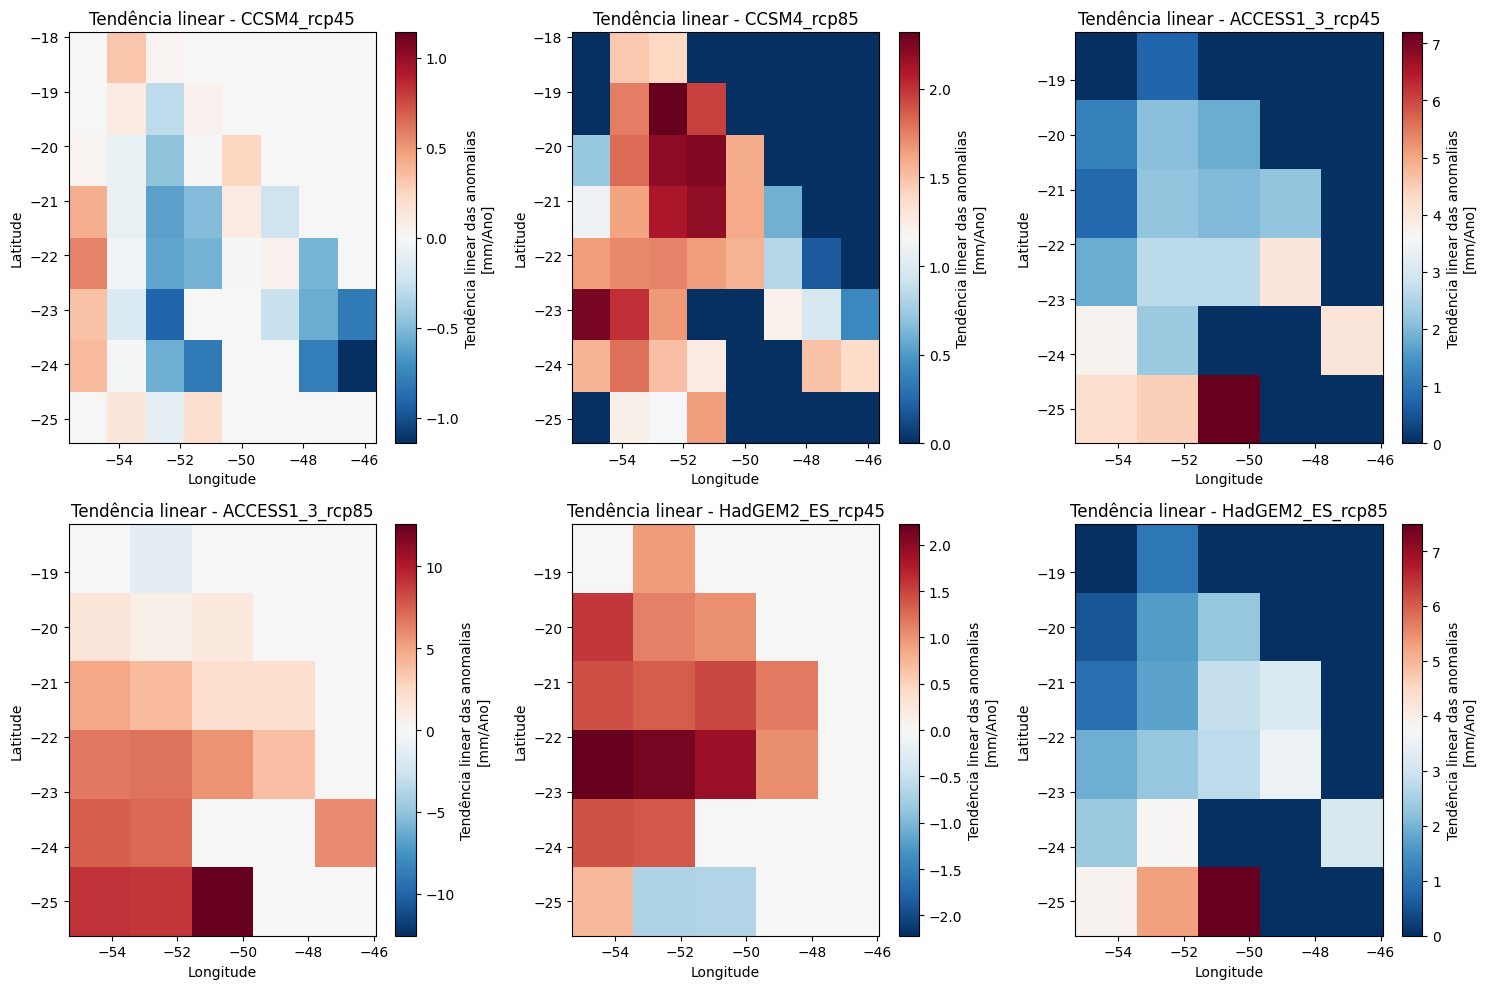

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Suponha que você tenha vários xarrays de anomalias, por exemplo:
anom_datasets = {
    "CCSM4_rcp45": anom_CCSM4_rcp45,
    "CCSM4_rcp85": anom_CCSM4_rcp85,
    "ACCESS1_3_rcp45": anom_ACCESS1_3_rcp45,
    "ACCESS1_3_rcp85": anom_ACCESS1_3_rcp85,
    "HadGEM2_ES_rcp45": anom_HadGEM2_ES_rcp45,
    "HadGEM2_ES_rcp85": anom_HadGEM2_ES_rcp85,
    # Adicione outros conjuntos de dados conforme necessário
}

# Cria uma função para calcular a tendência linear
def calc_trend(x):
    # Retorna os coeficientes da regressão linear (slope e intercept)
    # np.polyfit retorna [slope, intercept]
    return np.polyfit(np.arange(len(x)), x, 1)[0]

# Configuração da grade de subplots
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop sobre cada conjunto de dados de anomalias e criação dos subplots
for idx, (name, anom) in enumerate(anom_datasets.items()):
    # Calcula a tendência linear
    trend = xr.apply_ufunc(
    calc_trend,
    anom['pr'],  # acessando como DataArray
    vectorize=True,
    input_core_dims=[['year']],
    output_core_dims=[[]],
    dask='parallelized',
    output_dtypes=[anom['pr'].dtype]
)

    # Adiciona atributos ao DataArray de tendência
    trend.attrs['units'] = 'mm/Ano'
    trend.attrs['long_name'] = 'Tendência linear das anomalias'

    # Calcula a posição do subplot na grade
    row = idx // num_cols
    col = idx % num_cols

    # Plotar a tendência espacial no subplot correspondente
    trend.plot(ax=axes[row, col], cmap='RdBu_r')
    axes[row, col].set_title(f'Tendência linear - {name}')
    axes[row, col].set_xlabel('Longitude')
    axes[row, col].set_ylabel('Latitude')

# Ajusta automaticamente o layout dos subplots
plt.tight_layout()
plt.show()

##Plotagem de tendências Anomalias médias espaciais

In [ ]:
#Médias espaciais das anomalias
pr_CCSM4 = anom_CCSM4.mean(dim=['latitude', 'longitude'])
pr_ACCESS1_3 = anom_ACCESS1_3.mean(dim=['latitude', 'longitude'])
pr_HadGEM2_ES = anom_HadGEM2_ES.mean(dim=['latitude', 'longitude'])

pr_CCSM4_rcp45 = anom_CCSM4_rcp45.mean(dim=['latitude', 'longitude'])
pr_ACCESS1_3_rcp45 = anom_ACCESS1_3_rcp45.mean(dim=['latitude', 'longitude'])
pr_HadGEM2_ES_rcp45 = anom_HadGEM2_ES_rcp45.mean(dim=['latitude', 'longitude'])

pr_CCSM4_rcp85 = anom_CCSM4_rcp85.mean(dim=['latitude', 'longitude'])
pr_ACCESS1_3_rcp85 = anom_ACCESS1_3_rcp85.mean(dim=['latitude', 'longitude'])
pr_HadGEM2_ES_rcp85 = anom_HadGEM2_ES_rcp85.mean(dim=['latitude', 'longitude'])

#Calcula o desvio padrão
std_CCMS4 = anom_CCSM4.std(dim=['latitude', 'longitude'])
std_ACCESS1_3 = anom_ACCESS1_3.std(dim=['latitude', 'longitude'])
std_HadGEM2_ES = anom_HadGEM2_ES.std(dim=['latitude', 'longitude'])

std_CCSM4_rcp45 = anom_CCSM4_rcp45.std(dim=['latitude', 'longitude'])
std_ACCESS1_3_rcp45 = anom_ACCESS1_3_rcp45.std(dim=['latitude', 'longitude'])
std_HadGEM2_ES_rcp45 = anom_HadGEM2_ES_rcp45.std(dim=['latitude', 'longitude'])

std_CCSM4_rcp85 = anom_CCSM4_rcp85.std(dim=['latitude', 'longitude'])
std_ACCESS1_3_rcp85 = anom_ACCESS1_3_rcp85.std(dim=['latitude', 'longitude'])
std_HadGEM2_ES_rcp85 = anom_HadGEM2_ES_rcp85.std(dim=['latitude', 'longitude'])

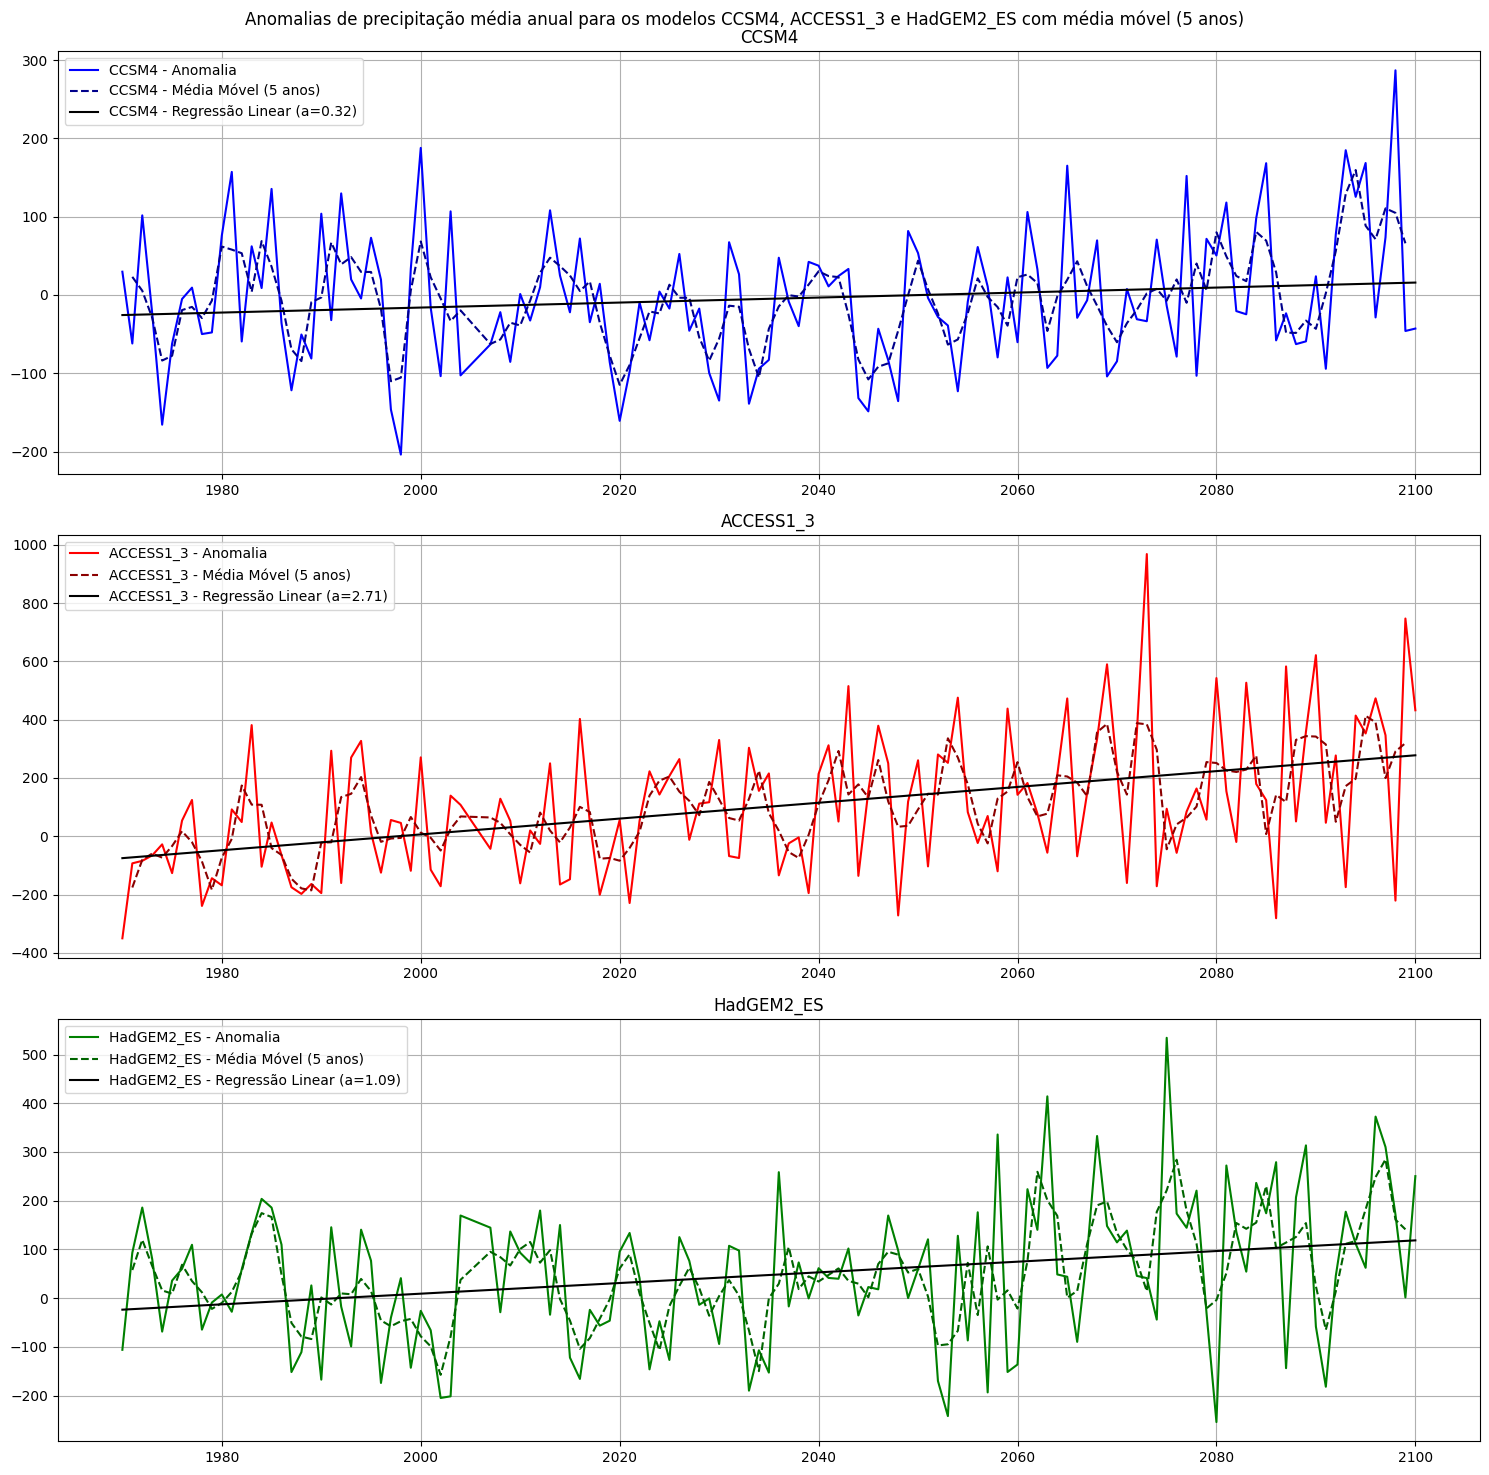

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import linregress

# Suponha que você tenha os DataArrays pr_CCSM4, pr_ACCESS1_3, pr_HadGEM2_ES definidos previamente

# Cria um dataset para cada modelo com as anomalias históricas e futuras (supondo que já tenha esses DataArrays)
CCSM4_anom = xr.merge([pr_CCSM4, pr_CCSM4_rcp85])
ACCESS1_3_anom = xr.merge([pr_ACCESS1_3, pr_ACCESS1_3_rcp85])
HadGEM2_ES_anom = xr.merge([pr_HadGEM2_ES, pr_HadGEM2_ES_rcp85])

# Função para calcular a média móvel
def calcula_media_movel(da, window=3):
    return da.rolling(year=window, center=True).mean()

# Calcula média móvel para cada modelo
CCSM4_anom_mm = calcula_media_movel(CCSM4_anom)
ACCESS1_3_anom_mm = calcula_media_movel(ACCESS1_3_anom)
HadGEM2_ES_anom_mm = calcula_media_movel(HadGEM2_ES_anom)

# Função para calcular regressão linear e retornar também o coeficiente a (slope)
def calcula_regressao(da):
    year = da.year
    pr = da.pr
    slope, intercept, _, _, _ = linregress(year, pr)
    regressao = slope * year + intercept
    return regressao, slope

# Calcula regressão linear para cada modelo e obtém o coeficiente a (slope)
CCSM4_regressao, CCSM4_slope = calcula_regressao(CCSM4_anom)
ACCESS1_3_regressao, ACCESS1_3_slope = calcula_regressao(ACCESS1_3_anom)
HadGEM2_ES_regressao, HadGEM2_ES_slope = calcula_regressao(HadGEM2_ES_anom)

# Plota as anomalias dos três modelos em figuras separadas com linha de tendência
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Plotagem para CCSM4
ax1.plot(CCSM4_anom.year, CCSM4_anom.pr, color='blue', label='CCSM4 - Anomalia')
ax1.plot(CCSM4_anom_mm.year, CCSM4_anom_mm.pr, color='darkblue', linestyle='--', label='CCSM4 - Média Móvel (5 anos)')
ax1.plot(CCSM4_anom.year, CCSM4_regressao, color='black', linestyle='-', label=f'CCSM4 - Regressão Linear (a={CCSM4_slope:.2f})')
ax1.set_title('CCSM4')
ax1.grid()
ax1.legend()

# Plotagem para ACCESS1_3
ax2.plot(ACCESS1_3_anom.year, ACCESS1_3_anom.pr, color='red', label='ACCESS1_3 - Anomalia')
ax2.plot(ACCESS1_3_anom_mm.year, ACCESS1_3_anom_mm.pr, color='darkred', linestyle='--', label='ACCESS1_3 - Média Móvel (5 anos)')
ax2.plot(ACCESS1_3_anom.year, ACCESS1_3_regressao, color='black', linestyle='-', label=f'ACCESS1_3 - Regressão Linear (a={ACCESS1_3_slope:.2f})')
ax2.set_title('ACCESS1_3')
ax2.grid()
ax2.legend()

# Plotagem para HadGEM2_ES
ax3.plot(HadGEM2_ES_anom.year, HadGEM2_ES_anom.pr, color='green', label='HadGEM2_ES - Anomalia')
ax3.plot(HadGEM2_ES_anom_mm.year, HadGEM2_ES_anom_mm.pr, color='darkgreen', linestyle='--', label='HadGEM2_ES - Média Móvel (5 anos)')
ax3.plot(HadGEM2_ES_anom.year, HadGEM2_ES_regressao, color='black', linestyle='-', label=f'HadGEM2_ES - Regressão Linear (a={HadGEM2_ES_slope:.2f})')
ax3.set_title('HadGEM2_ES')
ax3.grid()
ax3.legend()

# Adiciona um título geral para a figura
fig.suptitle('Anomalias de precipitação média anual para os modelos CCSM4, ACCESS1_3 e HadGEM2_ES com média móvel (5 anos)')

# Ajusta o espaçamento entre os subplots para evitar sobreposição de rótulos
plt.tight_layout()

# Mostra a figura
plt.show()


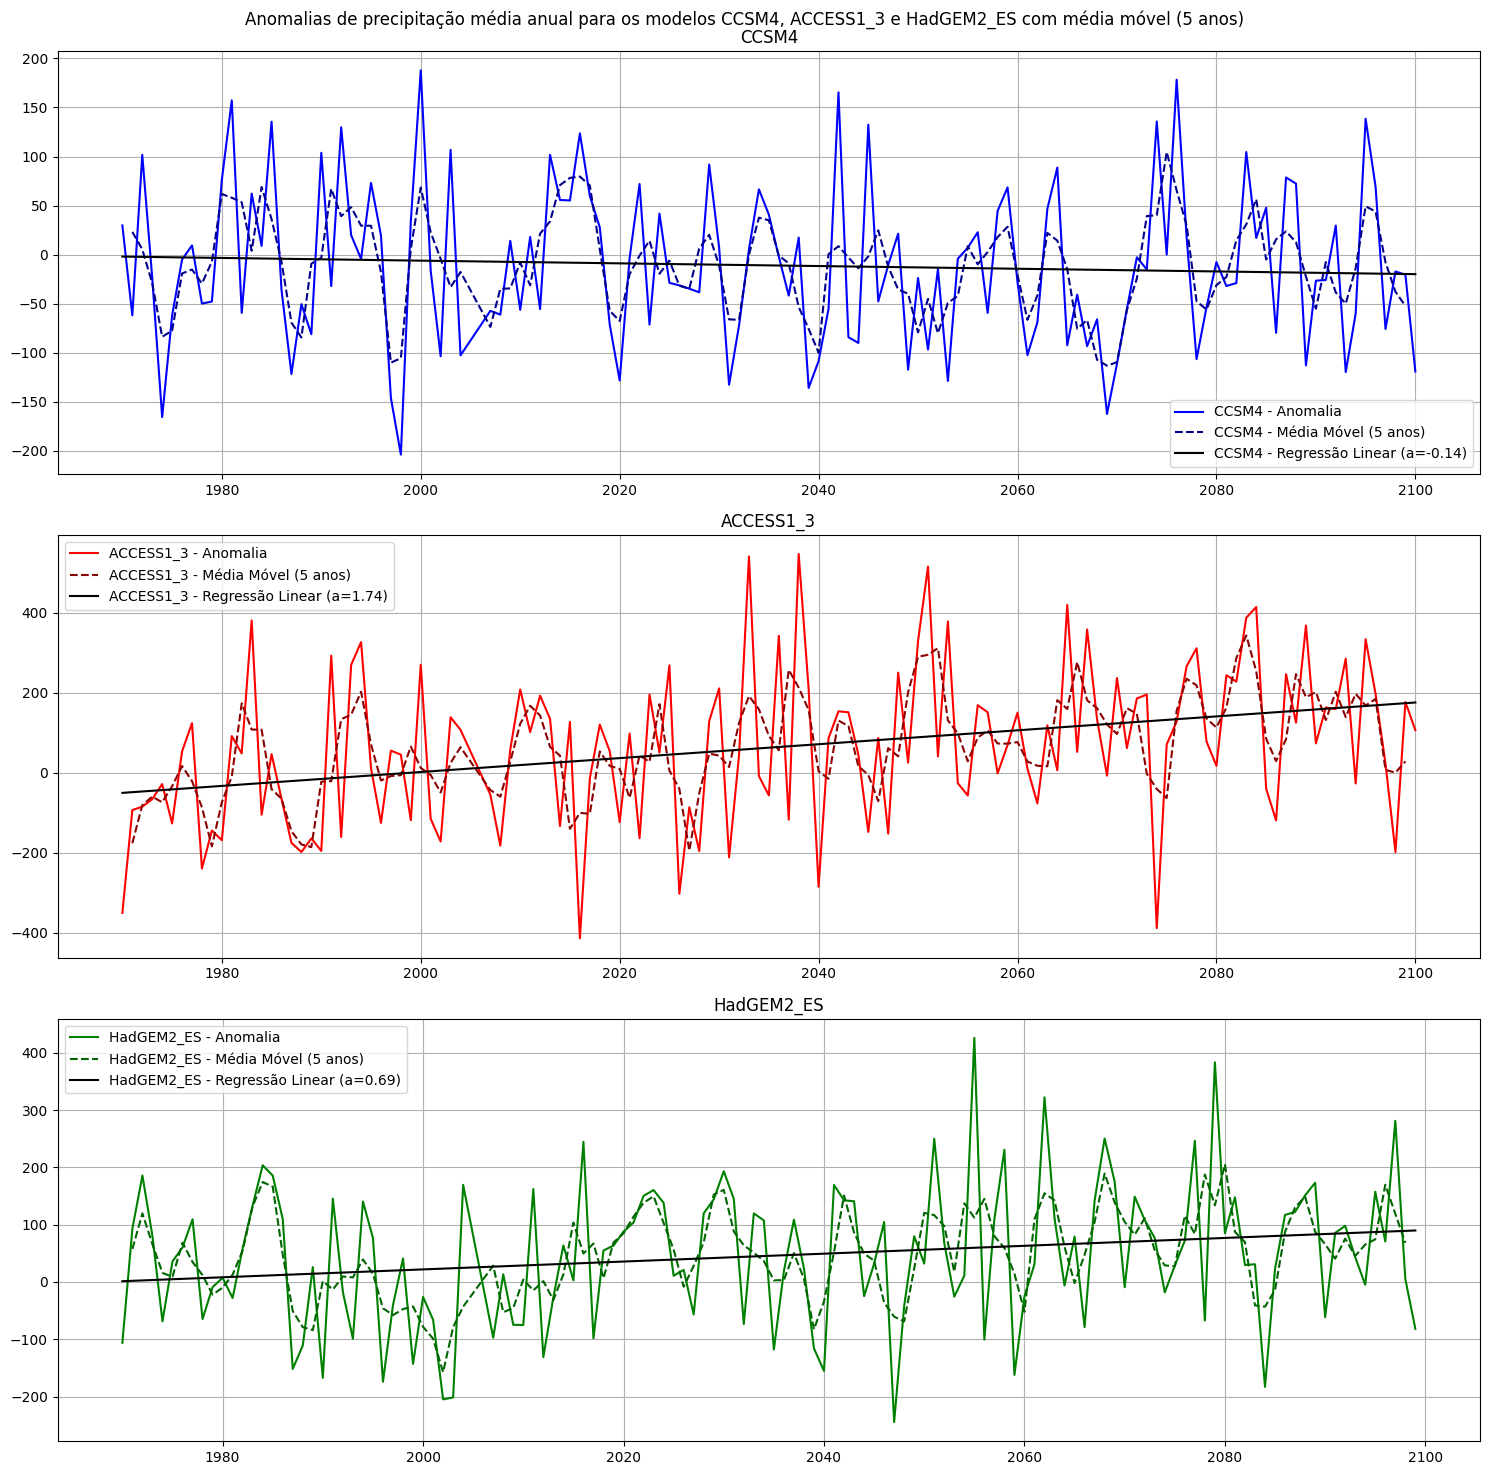

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import linregress

# Suponha que você tenha os DataArrays pr_CCSM4, pr_ACCESS1_3, pr_HadGEM2_ES definidos previamente

# Cria um dataset para cada modelo com as anomalias históricas e futuras (supondo que já tenha esses DataArrays)
CCSM4_anom = xr.merge([pr_CCSM4, pr_CCSM4_rcp45])
ACCESS1_3_anom = xr.merge([pr_ACCESS1_3, pr_ACCESS1_3_rcp45])
HadGEM2_ES_anom = xr.merge([pr_HadGEM2_ES, pr_HadGEM2_ES_rcp45])

# Função para calcular a média móvel
def calcula_media_movel(da, window=3):
    return da.rolling(year=window, center=True).mean()

# Calcula média móvel para cada modelo
CCSM4_anom_mm = calcula_media_movel(CCSM4_anom)
ACCESS1_3_anom_mm = calcula_media_movel(ACCESS1_3_anom)
HadGEM2_ES_anom_mm = calcula_media_movel(HadGEM2_ES_anom)

# Função para calcular regressão linear e retornar também o coeficiente a (slope)
def calcula_regressao(da):
    year = da.year
    pr = da.pr
    slope, intercept, _, _, _ = linregress(year, pr)
    regressao = slope * year + intercept
    return regressao, slope

# Calcula regressão linear para cada modelo e obtém o coeficiente a (slope)
CCSM4_regressao, CCSM4_slope = calcula_regressao(CCSM4_anom)
ACCESS1_3_regressao, ACCESS1_3_slope = calcula_regressao(ACCESS1_3_anom)
HadGEM2_ES_regressao, HadGEM2_ES_slope = calcula_regressao(HadGEM2_ES_anom)

# Plota as anomalias dos três modelos em figuras separadas com linha de tendência
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Plotagem para CCSM4
ax1.plot(CCSM4_anom.year, CCSM4_anom.pr, color='blue', label='CCSM4 - Anomalia')
ax1.plot(CCSM4_anom_mm.year, CCSM4_anom_mm.pr, color='darkblue', linestyle='--', label='CCSM4 - Média Móvel (5 anos)')
ax1.plot(CCSM4_anom.year, CCSM4_regressao, color='black', linestyle='-', label=f'CCSM4 - Regressão Linear (a={CCSM4_slope:.2f})')
ax1.set_title('CCSM4')
ax1.grid()
ax1.legend()

# Plotagem para ACCESS1_3
ax2.plot(ACCESS1_3_anom.year, ACCESS1_3_anom.pr, color='red', label='ACCESS1_3 - Anomalia')
ax2.plot(ACCESS1_3_anom_mm.year, ACCESS1_3_anom_mm.pr, color='darkred', linestyle='--', label='ACCESS1_3 - Média Móvel (5 anos)')
ax2.plot(ACCESS1_3_anom.year, ACCESS1_3_regressao, color='black', linestyle='-', label=f'ACCESS1_3 - Regressão Linear (a={ACCESS1_3_slope:.2f})')
ax2.set_title('ACCESS1_3')
ax2.grid()
ax2.legend()

# Plotagem para HadGEM2_ES
ax3.plot(HadGEM2_ES_anom.year, HadGEM2_ES_anom.pr, color='green', label='HadGEM2_ES - Anomalia')
ax3.plot(HadGEM2_ES_anom_mm.year, HadGEM2_ES_anom_mm.pr, color='darkgreen', linestyle='--', label='HadGEM2_ES - Média Móvel (5 anos)')
ax3.plot(HadGEM2_ES_anom.year, HadGEM2_ES_regressao, color='black', linestyle='-', label=f'HadGEM2_ES - Regressão Linear (a={HadGEM2_ES_slope:.2f})')
ax3.set_title('HadGEM2_ES')
ax3.grid()
ax3.legend()

# Adiciona um título geral para a figura
fig.suptitle('Anomalias de precipitação média anual para os modelos CCSM4, ACCESS1_3 e HadGEM2_ES com média móvel (5 anos)')

# Ajusta o espaçamento entre os subplots para evitar sobreposição de rótulos
plt.tight_layout()

# Mostra a figura
plt.show()


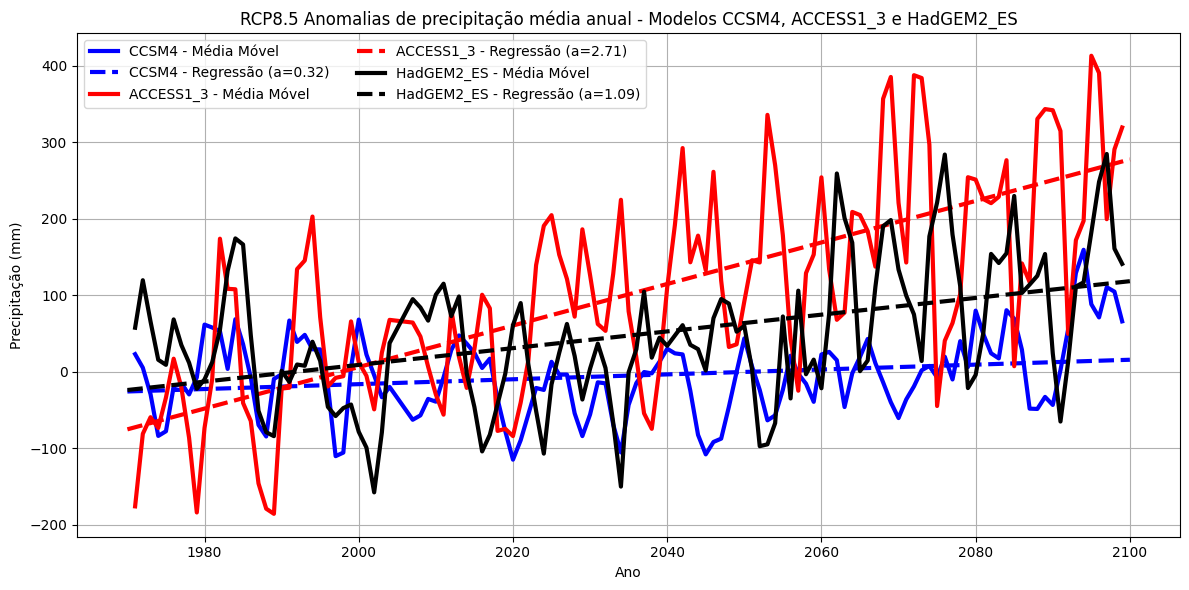

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import linregress

# Suponha que você tenha os DataArrays pr_CCSM4, pr_ACCESS1_3, pr_HadGEM2_ES definidos previamente

# Cria um dataset para cada modelo com as anomalias históricas e futuras (supondo que já tenha esses DataArrays)
CCSM4_anom = xr.merge([pr_CCSM4, pr_CCSM4_rcp85])
ACCESS1_3_anom = xr.merge([pr_ACCESS1_3, pr_ACCESS1_3_rcp85])
HadGEM2_ES_anom = xr.merge([pr_HadGEM2_ES, pr_HadGEM2_ES_rcp85])

# Função para calcular a média móvel
def calcula_media_movel(da, window=3):
    return da.rolling(year=window, center=True).mean()

# Calcula média móvel para cada modelo
CCSM4_anom_mm = calcula_media_movel(CCSM4_anom)
ACCESS1_3_anom_mm = calcula_media_movel(ACCESS1_3_anom)
HadGEM2_ES_anom_mm = calcula_media_movel(HadGEM2_ES_anom)

# Função para calcular regressão linear e retornar também o coeficiente a (slope)
def calcula_regressao(da):
    year = da.year
    pr = da.pr
    slope, intercept, _, _, _ = linregress(year, pr)
    regressao = slope * year + intercept
    return regressao, slope

# Calcula regressão linear para cada modelo e obtém o coeficiente a (slope)
CCSM4_regressao, CCSM4_slope = calcula_regressao(CCSM4_anom)
ACCESS1_3_regressao, ACCESS1_3_slope = calcula_regressao(ACCESS1_3_anom)
HadGEM2_ES_regressao, HadGEM2_ES_slope = calcula_regressao(HadGEM2_ES_anom)

fig, ax = plt.subplots(figsize=(12, 6))

# CCSM4
#ax.plot(CCSM4_anom.year, CCSM4_anom.pr, color='blue', label='CCSM4 - Anomalia')
ax.plot(CCSM4_anom_mm.year, CCSM4_anom_mm.pr, color='blue', linestyle='-', label='CCSM4 - Média Móvel',  linewidth=3)
ax.plot(CCSM4_anom.year, CCSM4_regressao, color='blue', linestyle='--', linewidth=3,
        label=f'CCSM4 - Regressão (a={CCSM4_slope:.2f})')

# ACCESS1_3
#ax.plot(ACCESS1_3_anom.year, ACCESS1_3_anom.pr, color='red', label='ACCESS1_3 - Anomalia')
ax.plot(ACCESS1_3_anom_mm.year, ACCESS1_3_anom_mm.pr, color='red', linestyle='-', label='ACCESS1_3 - Média Móvel',  linewidth=3)
ax.plot(ACCESS1_3_anom.year, ACCESS1_3_regressao, color='red', linestyle='--', linewidth=3,
        label=f'ACCESS1_3 - Regressão (a={ACCESS1_3_slope:.2f})')

# HadGEM2_ES
#ax.plot(HadGEM2_ES_anom.year, HadGEM2_ES_anom.pr, color='green', label='HadGEM2_ES - Anomalia')
ax.plot(HadGEM2_ES_anom_mm.year, HadGEM2_ES_anom_mm.pr, color='black', linestyle='-', label='HadGEM2_ES - Média Móvel',  linewidth=3)
ax.plot(HadGEM2_ES_anom.year, HadGEM2_ES_regressao, color='black', linestyle='--', linewidth=3,
        label=f'HadGEM2_ES - Regressão (a={HadGEM2_ES_slope:.2f})')

ax.set_title('RCP8.5 Anomalias de precipitação média anual - Modelos CCSM4, ACCESS1_3 e HadGEM2_ES')
ax.set_xlabel('Ano')
ax.set_ylabel('Precipitação (mm)')
ax.grid(True)
ax.legend(loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


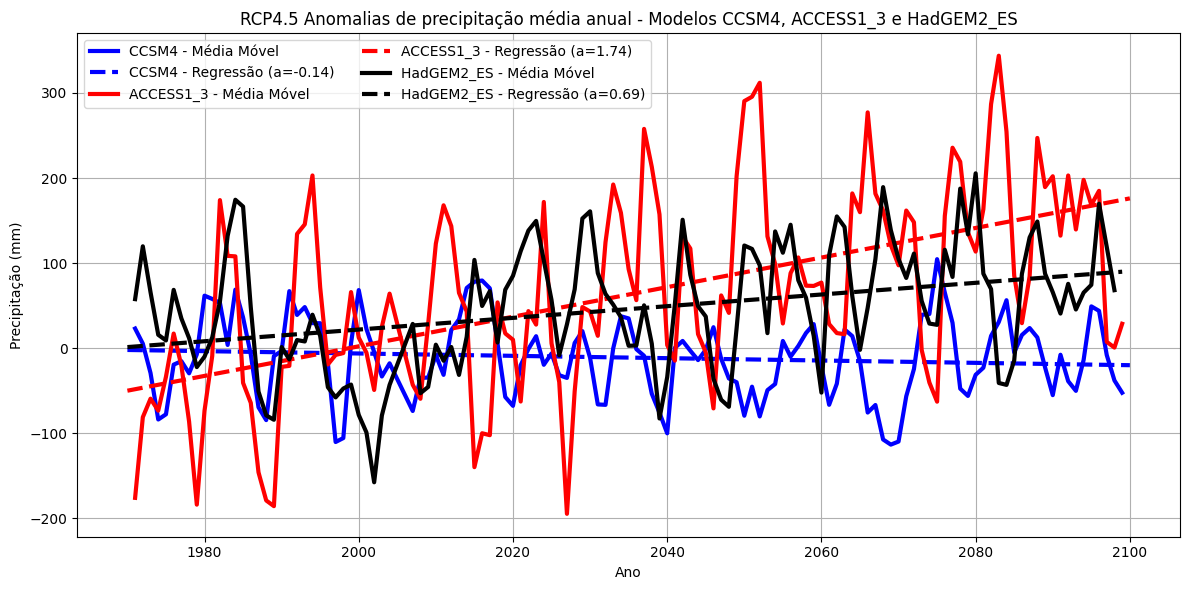

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import linregress

# Suponha que você tenha os DataArrays pr_CCSM4, pr_ACCESS1_3, pr_HadGEM2_ES definidos previamente

# Cria um dataset para cada modelo com as anomalias históricas e futuras (supondo que já tenha esses DataArrays)
CCSM4_anom = xr.merge([pr_CCSM4, pr_CCSM4_rcp45])
ACCESS1_3_anom = xr.merge([pr_ACCESS1_3, pr_ACCESS1_3_rcp45])
HadGEM2_ES_anom = xr.merge([pr_HadGEM2_ES, pr_HadGEM2_ES_rcp45])

# Função para calcular a média móvel
def calcula_media_movel(da, window=3):
    return da.rolling(year=window, center=True).mean()

# Calcula média móvel para cada modelo
CCSM4_anom_mm = calcula_media_movel(CCSM4_anom)
ACCESS1_3_anom_mm = calcula_media_movel(ACCESS1_3_anom)
HadGEM2_ES_anom_mm = calcula_media_movel(HadGEM2_ES_anom)

# Função para calcular regressão linear e retornar também o coeficiente a (slope)
def calcula_regressao(da):
    year = da.year
    pr = da.pr
    slope, intercept, _, _, _ = linregress(year, pr)
    regressao = slope * year + intercept
    return regressao, slope

# Calcula regressão linear para cada modelo e obtém o coeficiente a (slope)
CCSM4_regressao, CCSM4_slope = calcula_regressao(CCSM4_anom)
ACCESS1_3_regressao, ACCESS1_3_slope = calcula_regressao(ACCESS1_3_anom)
HadGEM2_ES_regressao, HadGEM2_ES_slope = calcula_regressao(HadGEM2_ES_anom)

fig, ax = plt.subplots(figsize=(12, 6))

# CCSM4
#ax.plot(CCSM4_anom.year, CCSM4_anom.pr, color='blue', label='CCSM4 - Anomalia')
ax.plot(CCSM4_anom_mm.year, CCSM4_anom_mm.pr, color='blue', linestyle='-', label='CCSM4 - Média Móvel', linewidth=3)
ax.plot(CCSM4_anom.year, CCSM4_regressao, color='blue', linestyle='--', linewidth=3,
        label=f'CCSM4 - Regressão (a={CCSM4_slope:.2f})')

# ACCESS1_3
#ax.plot(ACCESS1_3_anom.year, ACCESS1_3_anom.pr, color='red', label='ACCESS1_3 - Anomalia')
ax.plot(ACCESS1_3_anom_mm.year, ACCESS1_3_anom_mm.pr, color='red', linestyle='-', label='ACCESS1_3 - Média Móvel', linewidth=3)
ax.plot(ACCESS1_3_anom.year, ACCESS1_3_regressao, color='red', linestyle='--', linewidth=3,
        label=f'ACCESS1_3 - Regressão (a={ACCESS1_3_slope:.2f})')

# HadGEM2_ES
#ax.plot(HadGEM2_ES_anom.year, HadGEM2_ES_anom.pr, color='green', label='HadGEM2_ES - Anomalia')
ax.plot(HadGEM2_ES_anom_mm.year, HadGEM2_ES_anom_mm.pr, color='black', linestyle='-', label='HadGEM2_ES - Média Móvel', linewidth=3)
ax.plot(HadGEM2_ES_anom.year, HadGEM2_ES_regressao, color='black', linestyle='--', linewidth=3,
        label=f'HadGEM2_ES - Regressão (a={HadGEM2_ES_slope:.2f})')

ax.set_title('RCP4.5 Anomalias de precipitação média anual - Modelos CCSM4, ACCESS1_3 e HadGEM2_ES')
ax.set_xlabel('Ano')
ax.set_ylabel('Precipitação (mm)')
ax.grid(True)
ax.legend(loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

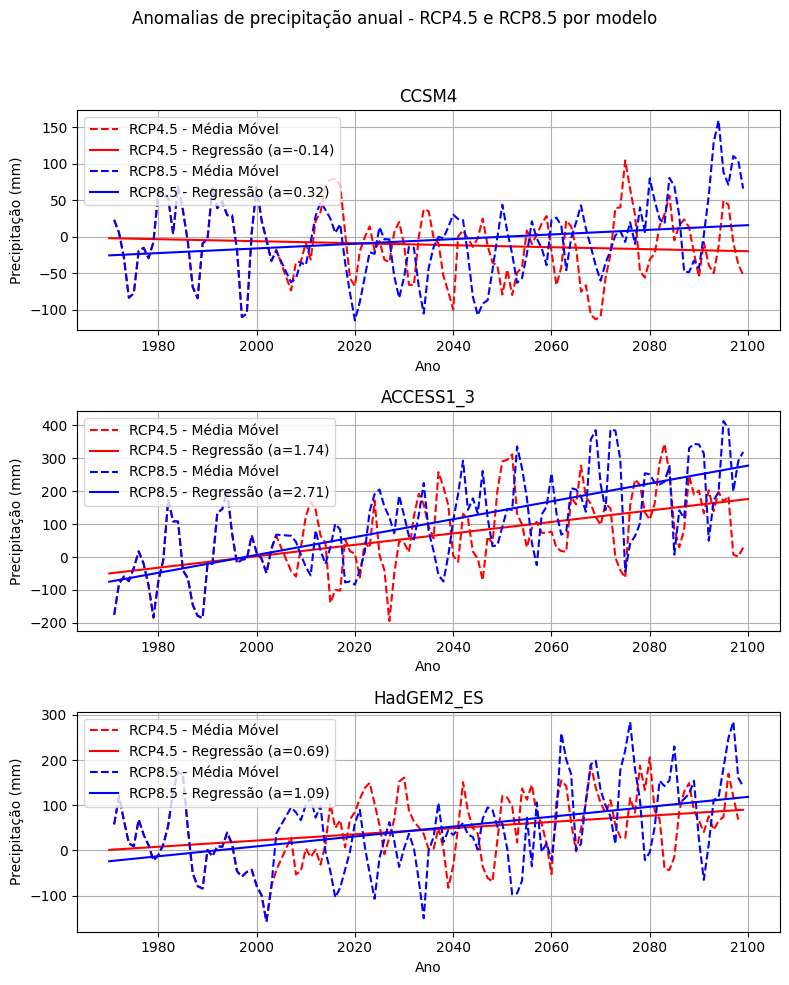

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import linregress

# Função para calcular média móvel
def calcula_media_movel(da, window=3):
    return da.rolling(year=window, center=True).mean()

# Função para calcular regressão linear e retornar também o coeficiente a (slope)
def calcula_regressao(da):
    year = da.year
    pr = da.pr
    slope, intercept, _, _, _ = linregress(year, pr)
    regressao = slope * year + intercept
    return regressao, slope

# Lista com os dados dos modelos
modelos = {
    'CCSM4': (pr_CCSM4, pr_CCSM4_rcp45, pr_CCSM4_rcp85),
    'ACCESS1_3': (pr_ACCESS1_3, pr_ACCESS1_3_rcp45, pr_ACCESS1_3_rcp85),
    'HadGEM2_ES': (pr_HadGEM2_ES, pr_HadGEM2_ES_rcp45, pr_HadGEM2_ES_rcp85)
}

cores = {
    'rcp45': 'red',
    'rcp85': 'blue'
}

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

for ax, (modelo, (hist, rcp45, rcp85)) in zip(axes, modelos.items()):
    # Junta histórico com cada cenário
    da_45 = xr.merge([hist, rcp45])
    da_85 = xr.merge([hist, rcp85])

    # Média móvel
    mm_45 = calcula_media_movel(da_45)
    mm_85 = calcula_media_movel(da_85)

    # Regressão
    reg_45, slope_45 = calcula_regressao(da_45)
    reg_85, slope_85 = calcula_regressao(da_85)

    # Plota
    ax.plot(mm_45.year, mm_45.pr, linestyle='--', color=cores['rcp45'], label='RCP4.5 - Média Móvel')
    ax.plot(da_45.year, reg_45, linestyle='-', color=cores['rcp45'], label=f'RCP4.5 - Regressão (a={slope_45:.2f})')

    ax.plot(mm_85.year, mm_85.pr, linestyle='--', color=cores['rcp85'], label='RCP8.5 - Média Móvel')
    ax.plot(da_85.year, reg_85, linestyle='-', color=cores['rcp85'], label=f'RCP8.5 - Regressão (a={slope_85:.2f})')

    ax.set_title(f'{modelo}')
    ax.set_xlabel('Ano')
    ax.grid(True)
    ax.legend(loc='upper left')
    ax.set_ylabel('Precipitação (mm)')

plt.suptitle('Anomalias de precipitação anual - RCP4.5 e RCP8.5 por modelo')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

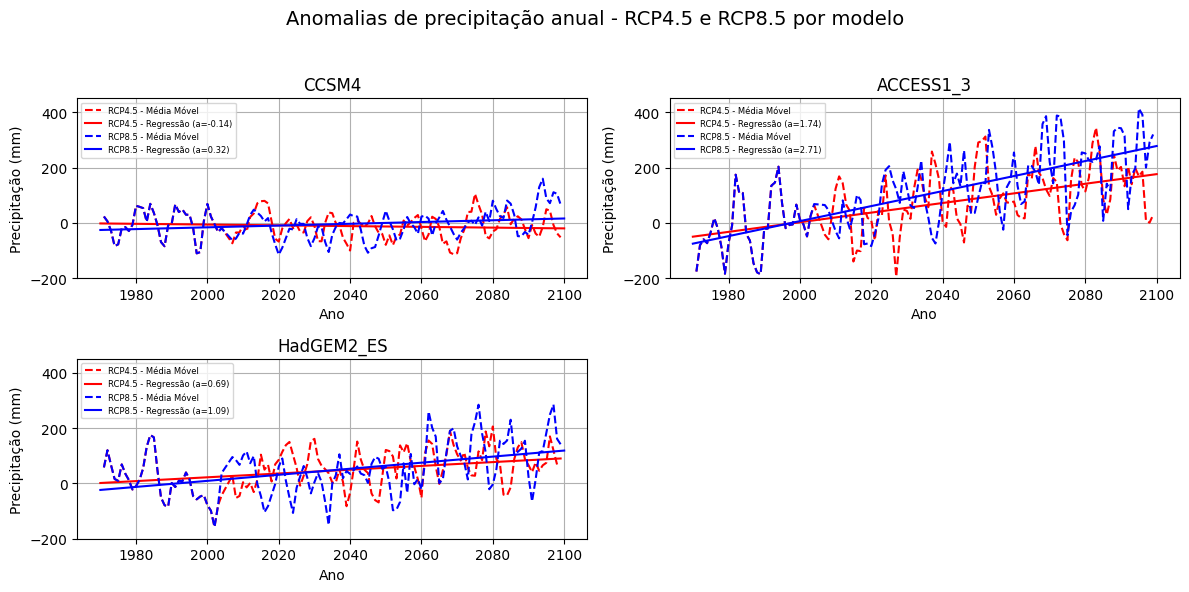

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xarray as xr
import numpy as np
from scipy.stats import linregress

# Função para calcular média móvel
def calcula_media_movel(da, window=3):
    return da.rolling(year=window, center=True).mean()

# Função para calcular regressão linear
def calcula_regressao(da):
    year = da.year
    pr = da.pr
    slope, intercept, _, _, _ = linregress(year, pr)
    regressao = slope * year + intercept
    return regressao, slope

# Dados dos modelos
modelos = {
    'CCSM4': (pr_CCSM4, pr_CCSM4_rcp45, pr_CCSM4_rcp85),
    'ACCESS1_3': (pr_ACCESS1_3, pr_ACCESS1_3_rcp45, pr_ACCESS1_3_rcp85),
    'HadGEM2_ES': (pr_HadGEM2_ES, pr_HadGEM2_ES_rcp45, pr_HadGEM2_ES_rcp85)
}

cores = {
    'rcp45': 'red',
    'rcp85': 'blue'
}

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

# Define os 3 axes
ax1 = fig.add_subplot(gs[0, 0])  # Primeiro plot - canto superior esquerdo
ax2 = fig.add_subplot(gs[0, 1])  # Segundo plot - canto superior direito
ax3 = fig.add_subplot(gs[1, 0])  # Terceiro plot - centralizado abaixo do primeiro

axes = [ax1, ax2, ax3]

# Loop para plotar cada modelo
for ax, (modelo, (hist, rcp45, rcp85)) in zip(axes, modelos.items()):
    # Junta histórico + cenário
    da_45 = xr.merge([hist, rcp45])
    da_85 = xr.merge([hist, rcp85])

    # Média móvel
    mm_45 = calcula_media_movel(da_45)
    mm_85 = calcula_media_movel(da_85)

    # Regressão
    reg_45, slope_45 = calcula_regressao(da_45)
    reg_85, slope_85 = calcula_regressao(da_85)

    # Plotagem
    ax.plot(mm_45.year, mm_45.pr, linestyle='--', color=cores['rcp45'], label='RCP4.5 - Média Móvel')
    ax.plot(da_45.year, reg_45, linestyle='-', color=cores['rcp45'], label=f'RCP4.5 - Regressão (a={slope_45:.2f})')

    ax.plot(mm_85.year, mm_85.pr, linestyle='--', color=cores['rcp85'], label='RCP8.5 - Média Móvel')
    ax.plot(da_85.year, reg_85, linestyle='-', color=cores['rcp85'], label=f'RCP8.5 - Regressão (a={slope_85:.2f})')

    ax.set_title(f'{modelo}')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Precipitação (mm)')
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=6)
    ax.set_ylim(-200, 450)

fig.suptitle('Anomalias de precipitação anual - RCP4.5 e RCP8.5 por modelo', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import os

folder_path = '/content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros'

for modelo, (hist, rcp45, rcp85) in modelos.items():
    # Junta histórico com o cenário
    da_45 = xr.merge([hist, rcp45])
    da_85 = xr.merge([hist, rcp85])

    # Define os nomes dos arquivos
    file_45 = f'{folder_path}/{modelo}_anom_precip_rcp45.nc'
    file_85 = f'{folder_path}/{modelo}_anom_precip_rcp85.nc'

    # Salva
    da_45.to_netcdf(file_45)
    da_85.to_netcdf(file_85)

    print(f'Salvo: {file_45} e {file_85}')


Salvo: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/CCSM4_anom_precip_rcp45.nc e /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/CCSM4_anom_precip_rcp85.nc
Salvo: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/ACCESS1_3_anom_precip_rcp45.nc e /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/ACCESS1_3_anom_precip_rcp85.nc
Salvo: /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/HadGEM2_ES_anom_precip_rcp45.nc e /content/drive/MyDrive/Artigo_ABRHIDRO_Mudanças_Climáticas/Dados_Anomalias_Futuros/HadGEM2_ES_anom_precip_rcp85.nc


# Outras análises

#Análise 2010-2030

In [ ]:
# Função para calcular média do período analisado
def calc_mean(ds, start_year, end_year):
    # Calcula a média para a região
    ds = ds.mean(dim=['latitude', 'longitude'])
    # Seleciona o período desejado
    temp_period = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    # Calcula as estatísticas
    mean_temp = temp_period.mean().item()
    return mean_temp

# Função para calcular variância do período analisado
def calc_var(ds, start_year, end_year):

    # Seleciona o período desejado
    temp_period = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    # Calcula as estatísticas
    var_temp = temp_period.var().item()
    return var_temp

def remove_linear_trend(ds,  start_year, end_year , time_name='time'):
    """
    Remove a tendência linear de uma variável em um xarray Dataset.
    """
    ds = ds.mean(dim=['latitude', 'longitude'])
    temperature = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    time = temperature['time']
    # Converter tempo para números para usar na regressão linear
    time_numeric = time.astype('datetime64[s]').astype(np.float64)
    # Ajuste uma regressão linear aos dados de precipitação
    slope, intercept, _, _, _ = stats.linregress(time_numeric, temperature)
    # Calcule os valores ajustados da tendência
    trend = slope * time_numeric + intercept
    # Subtraia a tendência dos dados originais para remover a tendência
    detrended_temperature = temperature - trend + trend[0]
    detrended_temperature['time'] = temperature['time']
    return detrended_temperature

In [ ]:
# Calcula as estatísticas para os períodos especificados
mean_CCSM4 = calc_mean(CCSM4, 1975, 2004)
mean_ACCESS1_3 = calc_mean(ACCESS1_3, 1975, 2004)
mean_HadGEM2_ES = calc_mean(HadGEM2_ES, 1975, 2004)

mean_CCSM4_rcp45 = calc_mean(CCSM4_rcp45, 2010, 2030)
mean_ACCESS1_3_rcp45 = calc_mean(ACCESS1_3_rcp45, 2010, 2030)
mean_HadGEM2_ES_rcp45 = calc_mean(HadGEM2_ES_rcp45, 2010, 2030)

mean_CCSM4_rcp85 = calc_mean(CCSM4_rcp85, 2010, 2030)
mean_ACCESS1_3_rcp85 = calc_mean(ACCESS1_3_rcp85, 2010, 2030)
mean_HadGEM2_ES_rcp85 = calc_mean(HadGEM2_ES_rcp85, 2010, 2030)

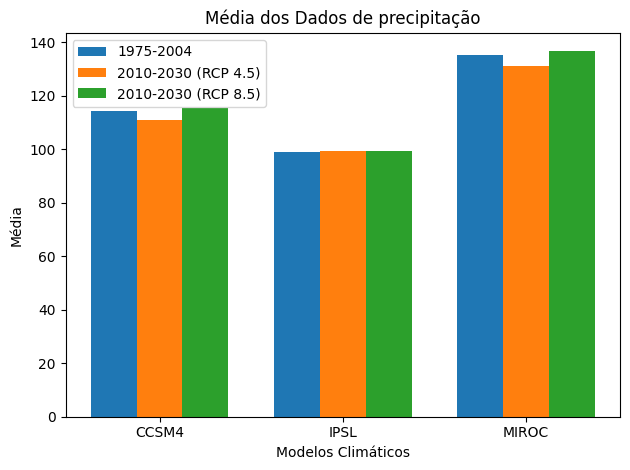

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
mean_1975_2004 = [mean_CCSM4, mean_ACCESS1_3, mean_HadGEM2_ES]
mean_2010_2030_rcp45 = [mean_CCSM4_rcp45, mean_ACCESS1_3_rcp45, mean_HadGEM2_ES_rcp45]
mean_2010_2030_rcp85 = [mean_CCSM4_rcp85, mean_ACCESS1_3_rcp85, mean_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, mean_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, mean_2010_2030_rcp85, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, mean_2010_2030_rcp45, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Média')
ax.set_title('Média dos Dados de precipitação')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
%%capture
#Retira a tendência linear dos dados.
notrend_CCSM4 = remove_linear_trend(CCSM4, 1975, 2004)
notrend_ACCESS1_3 = remove_linear_trend(ACCESS1_3, 1975, 2004)
notrend_HadGEM2_ES = remove_linear_trend(HadGEM2_ES, 1975, 2004)

notrend_CCSM4_rcp45 = remove_linear_trend(CCSM4_rcp45, 2010, 2030)
notrend_ACCESS1_3_rcp45 = remove_linear_trend(ACCESS1_3_rcp45, 2010, 2030)
notrend_HadGEM2_ES_rcp45 = remove_linear_trend(HadGEM2_ES_rcp45, 2010, 2030)

notrend_CCSM4_rcp85 = remove_linear_trend(CCSM4_rcp85, 2010, 2030)
notrend_ACCESS1_3_rcp85 = remove_linear_trend(ACCESS1_3_rcp85, 2010, 2030)
notrend_HadGEM2_ES_rcp85 = remove_linear_trend(HadGEM2_ES_rcp85, 2010, 2030)

In [ ]:
#Calcula a variância dos dados.
var_CCSM4 = calc_var(notrend_CCSM4, 1975, 2004)
var_ACCESS1_3 = calc_var(notrend_ACCESS1_3, 1975, 2004)
var_HadGEM2_ES = calc_var(notrend_HadGEM2_ES, 1975, 2004)

var_CCSM4_rcp45 = calc_var(notrend_CCSM4_rcp45, 2010, 2030)
var_ACCESS1_3_rcp45 = calc_var(notrend_ACCESS1_3_rcp45, 2010, 2030)
var_HadGEM2_ES_rcp45 = calc_var(notrend_HadGEM2_ES_rcp45, 2010, 2030)

var_CCSM4_rcp85 = calc_var(notrend_CCSM4_rcp85, 2010, 2030)
var_ACCESS1_3_rcp85 = calc_var(notrend_ACCESS1_3_rcp85, 2010, 2030)
var_HadGEM2_ES_rcp85 = calc_var(notrend_HadGEM2_ES_rcp85, 2010, 2030)

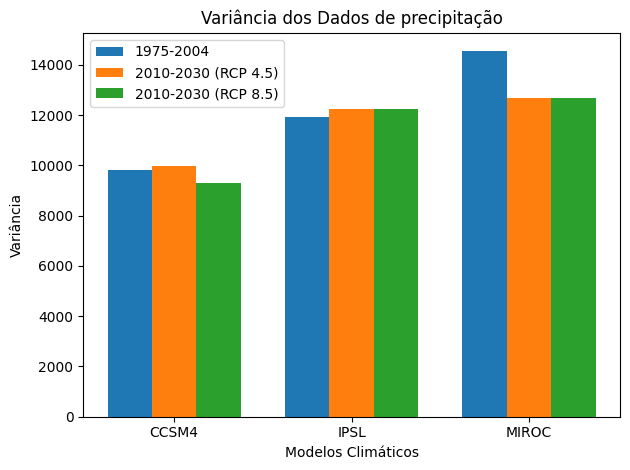

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
variances_1975_2004 = [var_CCSM4, var_ACCESS1_3, var_HadGEM2_ES]
variances_2010_2030_rcp45 = [var_CCSM4_rcp45, var_ACCESS1_3_rcp45, var_HadGEM2_ES_rcp85]
variances_2010_2030_rcp85 = [var_CCSM4_rcp85, var_ACCESS1_3_rcp85, var_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, variances_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, variances_2010_2030_rcp45, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, variances_2010_2030_rcp85, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Variância')
ax.set_title('Variância dos Dados de precipitação')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
#Função que calcula a maior precipitação do ano.

def max_temp_year(ds):
  #Calcula a média para a região
  temp = ds.mean(dim=['latitude', 'longitude'])
  # 1. Agrupar por ano
  temp_por_ano = temp.groupby('time.year')
  # 2. Calcular a precipitação máxima de cada ano
  temp_max = temp_por_ano.max(dim='time')
  #Retorna a temp_max
  return temp_max

#Função que calcula a precipitação mais fria do ano.
def min_temp_year(ds):
  temp = ds
  temp = ds.mean(dim=['latitude', 'longitude'])
  # 1. Agrupar por ano
  temp_por_ano = temp.groupby('time.year')
  # 2. Calcular a precipitação máxima de cada ano
  temp_min = temp_por_ano.min(dim='time')
  #Retorna a temp_max
  return temp_min

In [ ]:
#Máximas anuais
max_CCSM4 = max_temp_year(CCSM4)
max_ACCESS1_3 = max_temp_year(ACCESS1_3)
max_HadGEM2_ES = max_temp_year(HadGEM2_ES)

max_CCSM4_rcp45 = max_temp_year(CCSM4_rcp45).sel(year=slice("2010", "2030"))
max_ACCESS1_3_rcp45 = max_temp_year(ACCESS1_3_rcp45).sel(year=slice("2010", "2030"))
max_HadGEM2_ES_rcp45 = max_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2010", "2030"))

max_CCSM4_rcp85 = max_temp_year(CCSM4_rcp85).sel(year=slice("2010", "2030"))
max_ACCESS1_3_rcp85 = max_temp_year(ACCESS1_3_rcp85).sel(year=slice("2010", "2030"))
max_HadGEM2_ES_rcp85 = max_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2010", "2030"))

#Anomalias das máximas
mean_max_CCSM4 = max_CCSM4.mean(dim='year')
mean_max_ACCESS1_3 = max_ACCESS1_3.mean(dim='year')
mean_max_HadGEM2_ES = max_HadGEM2_ES.mean(dim='year')

anom_max_CCSM4_rcp45 = max_CCSM4_rcp45 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp45 = max_ACCESS1_3_rcp45 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp45 = max_HadGEM2_ES_rcp45 - mean_max_HadGEM2_ES

anom_max_CCSM4_rcp85 = max_CCSM4_rcp85 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp85 = max_ACCESS1_3_rcp85 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp85 = max_HadGEM2_ES_rcp85 - mean_max_HadGEM2_ES


#Minimas anuais
min_CCSM4 = min_temp_year(CCSM4)
min_ACCESS1_3 = min_temp_year(ACCESS1_3)
min_HadGEM2_ES = min_temp_year(HadGEM2_ES)

min_CCSM4_rcp45 = min_temp_year(CCSM4_rcp45).sel(year=slice("2010", "2030"))
min_ACCESS1_3_rcp45 = min_temp_year(ACCESS1_3_rcp45).sel(year=slice("2010", "2030"))
min_HadGEM2_ES_rcp45 = min_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2010", "2030"))

min_CCSM4_rcp85 = min_temp_year(CCSM4_rcp85).sel(year=slice("2010", "2030"))
min_ACCESS1_3_rcp85 = min_temp_year(ACCESS1_3_rcp85).sel(year=slice("2010", "2030"))
min_HadGEM2_ES_rcp85 = min_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2010", "2030"))

#Calculo das anomalias
mean_min_CCSM4 = min_CCSM4.mean(dim='year')
mean_min_ACCESS1_3 = min_ACCESS1_3.mean(dim='year')
mean_min_HadGEM2_ES = min_HadGEM2_ES.mean(dim='year')

anom_min_CCSM4_rcp45 = min_CCSM4_rcp45 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp45 = min_ACCESS1_3_rcp45 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp45 = min_HadGEM2_ES_rcp45 - mean_min_HadGEM2_ES

anom_min_CCSM4_rcp85 = min_CCSM4_rcp85 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp85 = min_ACCESS1_3_rcp85 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp85 = min_HadGEM2_ES_rcp85 - mean_min_HadGEM2_ES

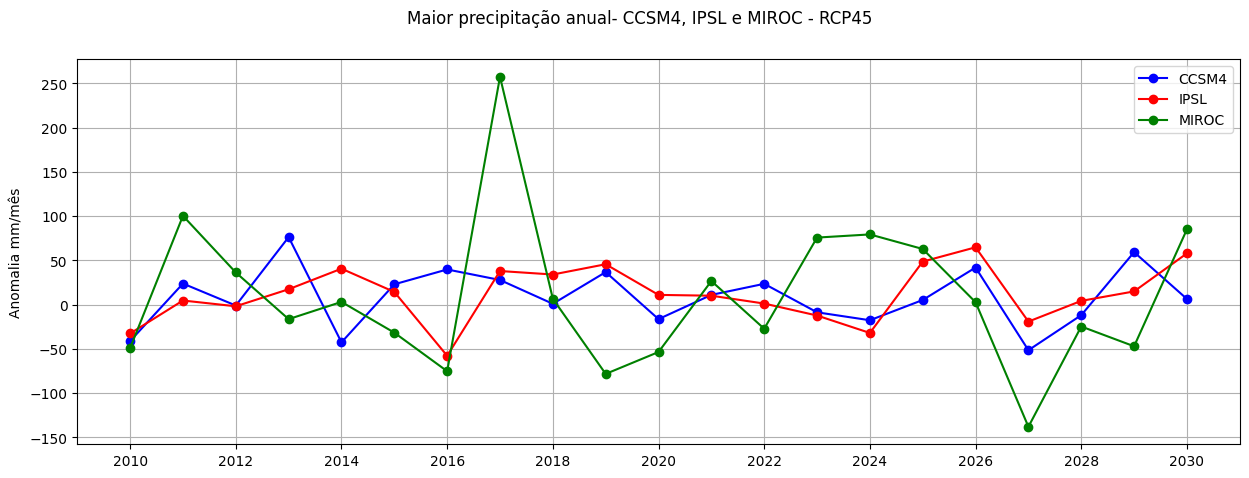

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp45.year, anom_max_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp45.year, anom_max_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp45.year, anom_max_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

#Ajeita o título do eixo y
ax.set_ylabel('Anomalia mm/mês')

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

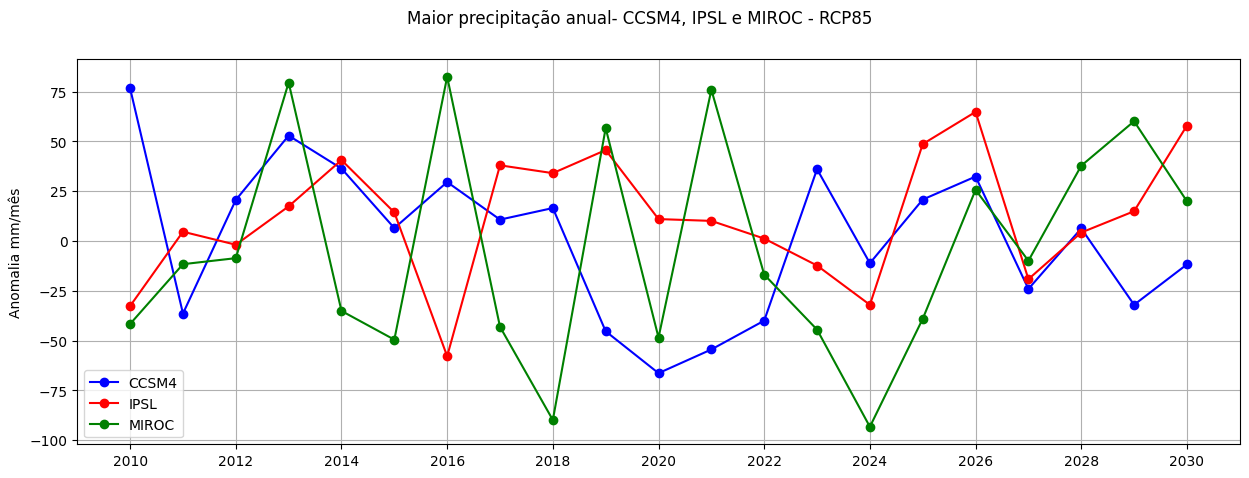

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp85.year, anom_max_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp85.year, anom_max_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp85.year, anom_max_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP85')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

#Ajeita o título do eixo y
ax.set_ylabel('Anomalia mm/mês')

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

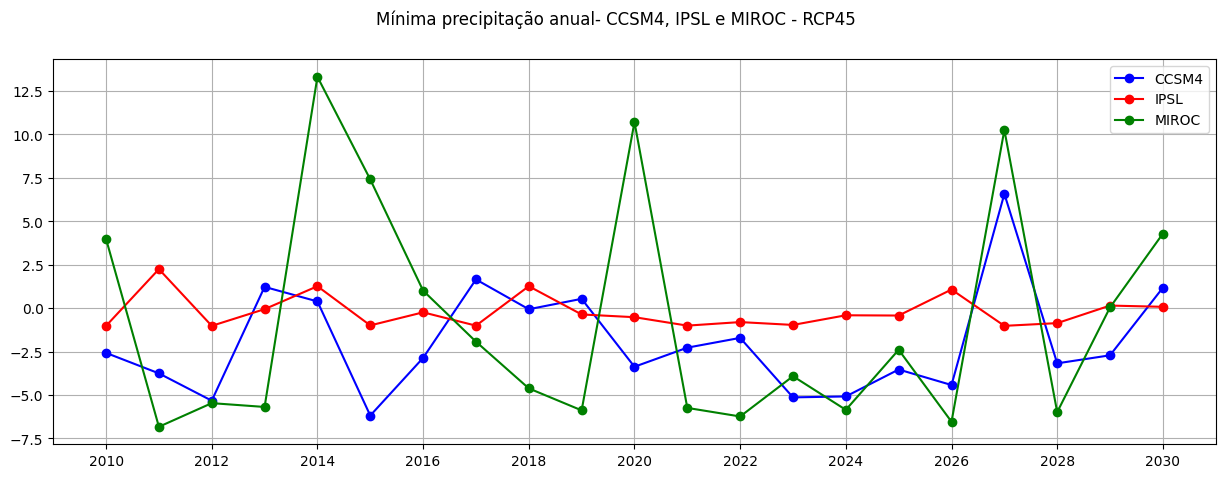

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp45.year, anom_min_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp45.year, anom_min_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp45.year, anom_min_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

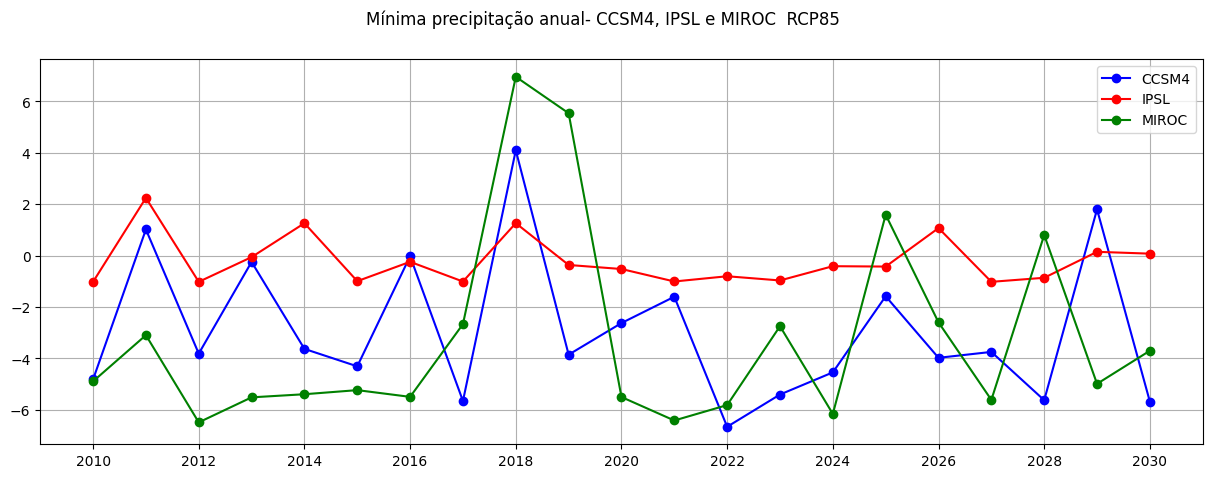

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp85.year, anom_min_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp85.year, anom_min_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp85.year, anom_min_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES  RCP85')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

##Análises mensais: Médias do período histórico com 2010 e 2030.

In [ ]:
#Análises mensais

CCSM4_montly = CCSM4.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
ACCESS1_3_montly = ACCESS1_3.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
HadGEM2_ES_montly = HadGEM2_ES.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()

CCSM4_rcp45_montly = CCSM4_rcp45.sel(time=slice("2010", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
ACCESS1_3_rcp45_montly = ACCESS1_3_rcp45.sel(time=slice("2010", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
HadGEM2_ES_rcp45_montly = HadGEM2_ES_rcp45.sel(time=slice("2010", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()

CCSM4_rcp85_montly = CCSM4_rcp85.sel(time=slice("2010", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
ACCESS1_3_rcp85_montly = ACCESS1_3_rcp85.sel(time=slice("2010", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
HadGEM2_ES_rcp85_montly = HadGEM2_ES_rcp85.sel(time=slice("2010", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()

In [ ]:
anom_CCSM4_rcp45_montly = CCSM4_rcp45_montly - CCSM4_montly
anom_ACCESS1_3_rcp45_montly = ACCESS1_3_rcp45_montly - ACCESS1_3_montly
anom_HadGEM2_ES_rcp45_montly = HadGEM2_ES_rcp45_montly - HadGEM2_ES_montly

anom_CCSM4_rcp85_monthly = CCSM4_rcp85_montly - CCSM4_montly
anom_ACCESS1_3_rcp85_monthly = ACCESS1_3_rcp85_montly - ACCESS1_3_montly
anom_HadGEM2_ES_rcp85_monthly = HadGEM2_ES_rcp85_montly - HadGEM2_ES_montly

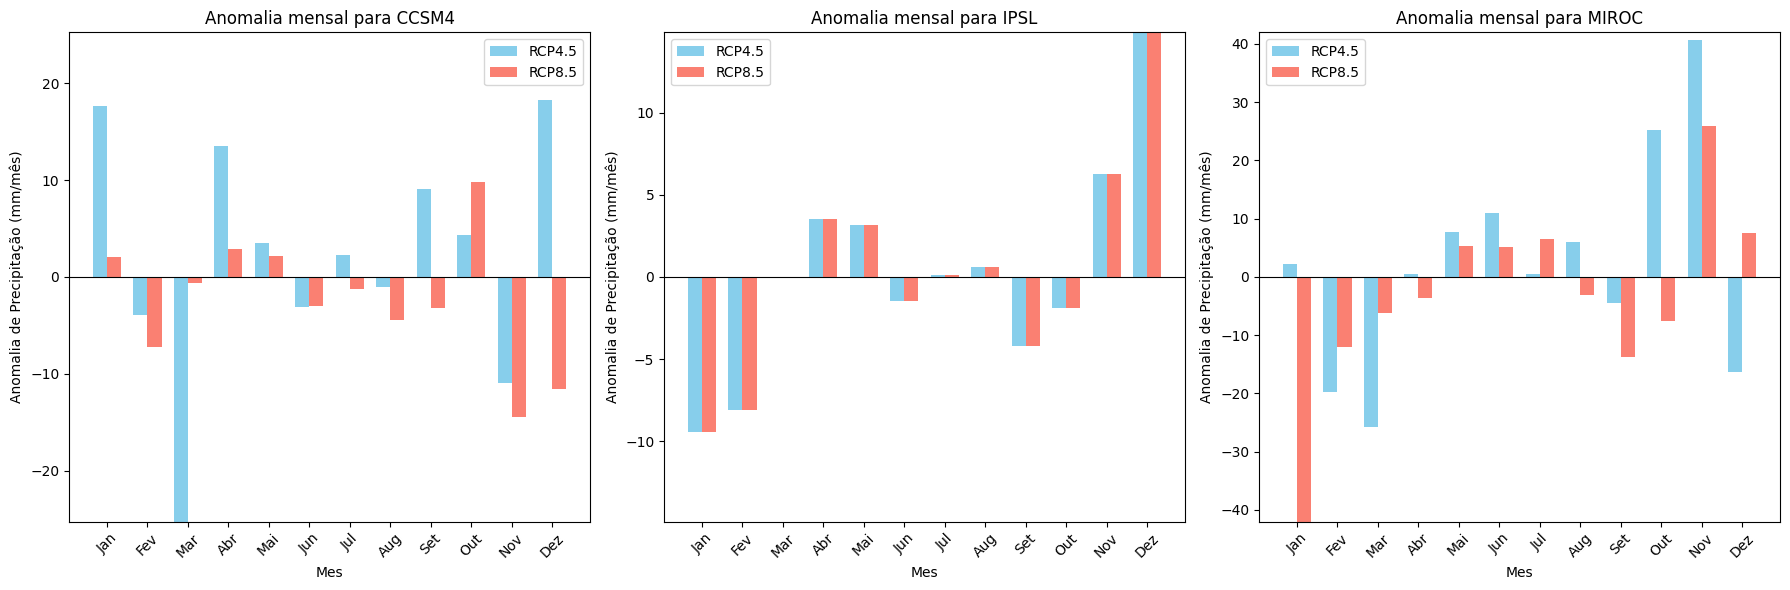

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extrai os dados mensais e os meses
months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Aug', 'Set', 'Out', 'Nov', 'Dez']
index = np.arange(len(months))
bar_width = 0.35

# Função para extrair os dados de anomalia
def extract_anomalies(anom_monthly):
    return anom_monthly.values

# Extrai os dados de anomalia para cada cenário e modelo
anom_CCSM4_rcp45 = extract_anomalies(anom_CCSM4_rcp45_montly)
anom_CCSM4_rcp85 = extract_anomalies(anom_CCSM4_rcp85_monthly)
anom_ACCESS1_3_rcp45 = extract_anomalies(anom_ACCESS1_3_rcp45_montly)
anom_ACCESS1_3_rcp85 = extract_anomalies(anom_ACCESS1_3_rcp85_monthly)
anom_HadGEM2_ES_rcp45 = extract_anomalies(anom_HadGEM2_ES_rcp45_montly)
anom_HadGEM2_ES_rcp85 = extract_anomalies(anom_HadGEM2_ES_rcp85_monthly)

# Cria uma figura e eixos para os gráficos de barras
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Dados e títulos para cada eixo
data = [
    (anom_CCSM4_rcp45, anom_CCSM4_rcp85, 'CCSM4'),
    (anom_ACCESS1_3_rcp45, anom_ACCESS1_3_rcp85, 'ACCESS1_3'),
    (anom_HadGEM2_ES_rcp45, anom_HadGEM2_ES_rcp85, 'HadGEM2_ES')
]

# Plotando cada conjunto de dados em seu respectivo eixo
for ax, (anom_rcp45, anom_rcp85, title) in zip(axes, data):
    # Plota o gráfico de barras para RCP4.5
    ax.bar(index - bar_width/2, anom_rcp45, bar_width, label='RCP4.5', color='skyblue')

    # Plota o gráfico de barras para RCP8.5
    ax.bar(index + bar_width/2, anom_rcp85, bar_width, label='RCP8.5', color='salmon')

    # Define os rótulos dos eixos
    ax.set_xlabel('Mes')
    ax.set_ylabel(f'Anomalia de Precipitação (mm/mês)')
    ax.set_title(f'Anomalia mensal para {title}')

    # Define os rótulos do eixo X como os nomes dos meses
    ax.set_xticks(index)
    ax.set_xticklabels(months, rotation=45)

    # Adiciona uma linha horizontal no eixo y = 0
    ax.axhline(0, color='black', linewidth=0.8)

    # Ajusta os limites do eixo Y para centralizar 0
    y_max = max(anom_rcp45.max(), anom_rcp85.max())
    y_min = min(anom_rcp45.min(), anom_rcp85.min())
    y_abs_max = max(abs(y_min), abs(y_max))
    ax.set_ylim(-y_abs_max, y_abs_max)

    # Adiciona a legenda
    ax.legend()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()


##Análises DJF

In [ ]:
# Importar a biblioteca necessária
import xarray as xr

# Análises mensais agrupadas por estação para cada ano
CCSM4_season_year = CCSM4.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
ACCESS1_3_season_year = ACCESS1_3.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
HadGEM2_ES_season_year = HadGEM2_ES.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())

CCSM4_rcp45_season_year = CCSM4_rcp45.sel(time=slice("2007", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
ACCESS1_3_rcp45_season_year = ACCESS1_3_rcp45.sel(time=slice("2007", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
HadGEM2_ES_rcp45_season_year = HadGEM2_ES_rcp45.sel(time=slice("2007", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())

CCSM4_rcp85_season_year = CCSM4_rcp85.sel(time=slice("2007", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
ACCESS1_3_rcp85_season_year = ACCESS1_3_rcp85.sel(time=slice("2007", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
HadGEM2_ES_rcp85_season_year = HadGEM2_ES_rcp85.sel(time=slice("2007", "2030")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())



In [ ]:
# Cria um dataset para cada modelo com as anomalias históricas e futuras (supondo que já tenha esses DataArrays)
CCSM4_season_rcp45 =  xr.merge([CCSM4_season_year, CCSM4_rcp45_season_year]).sel(year=slice("1980", "2030"))
CCSM4_season_rcp85 =  xr.merge([CCSM4_season_year, CCSM4_rcp85_season_year]).sel(year=slice("1980", "2030"))

ACCESS1_3_season_rcp45 =  xr.merge([ACCESS1_3_season_year, ACCESS1_3_rcp45_season_year]).sel(year=slice("1980", "2030"))
ACCESS1_3_season_rcp85 =  xr.merge([ACCESS1_3_season_year, ACCESS1_3_rcp85_season_year]).sel(year=slice("1980", "2030"))

HadGEM2_ES_season_rcp45 =  xr.merge([HadGEM2_ES_season_year, HadGEM2_ES_rcp45_season_year]).sel(year=slice("1980", "2030"))
HadGEM2_ES_season_rcp85 =  xr.merge([HadGEM2_ES_season_year, HadGEM2_ES_rcp85_season_year]).sel(year=slice("1980", "2030"))

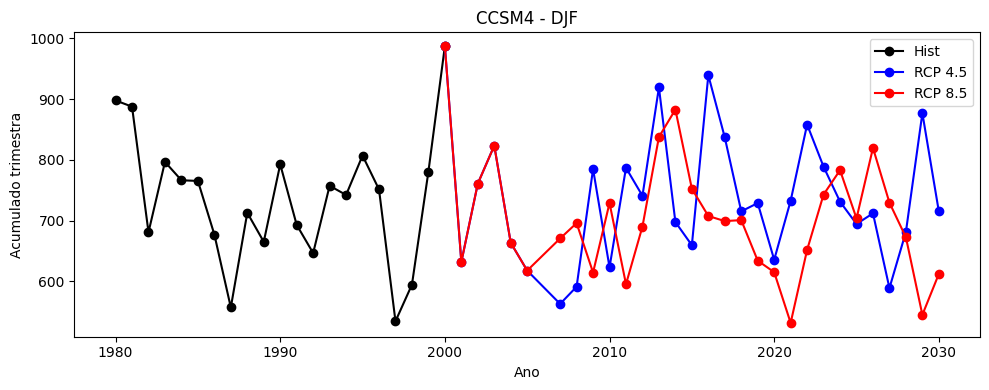

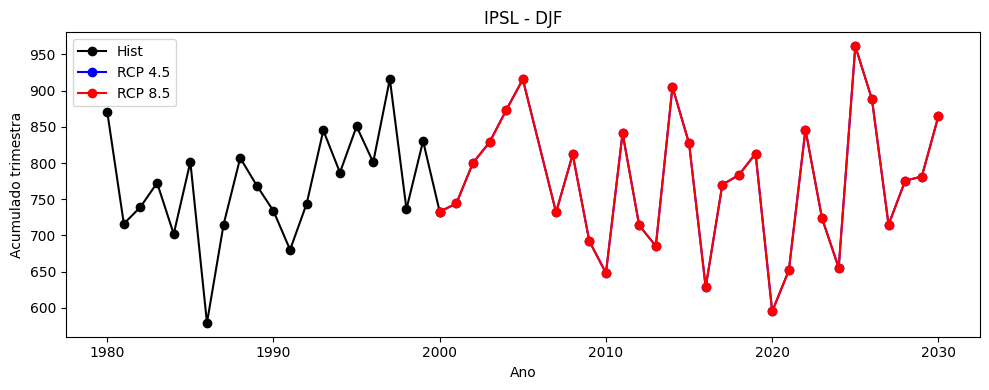

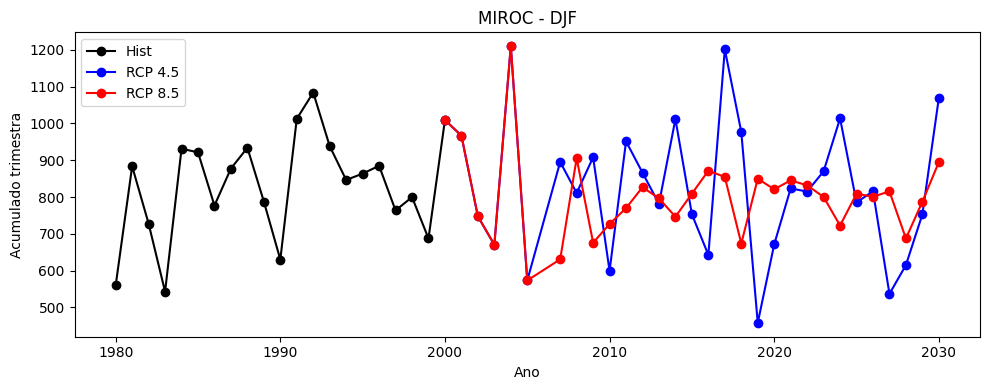

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Função para plotar os dados de um modelo para a estação DJF
def plot_model_djf(model_name, season_rcp45, season_rcp85):
    season = 'DJF'

    plt.figure(figsize=(10, 4))

    # Selecionar dados para a estação DJF
    season_hist = season_rcp45.sel(season=season, year=slice("1980", "2000"))
    season_rcp45_djf = season_rcp45.sel(season=season, year=slice("2000", "2030"))
    season_rcp85_djf = season_rcp85.sel(season=season, year=slice('2000', '2030'))

    # Plotar os dados]

    #Plota o histórico
    plt.plot(season_hist.year, season_hist.pr, label='Hist', color='black', marker='o')

    # Plot RCP 4.5
    plt.plot(season_rcp45_djf.year, season_rcp45_djf.pr, label='RCP 4.5', color='blue', marker='o')

    # Plot RCP 8.5
    plt.plot(season_rcp85_djf.year, season_rcp85_djf.pr, label='RCP 8.5', color='red', marker='o')

    plt.title(f'{model_name} - {season}')
    plt.legend()
    plt.xlabel('Ano')
    plt.ylabel('Acumulado trimestra')

    plt.tight_layout()
    plt.show()

# Plotando para CCSM4
plot_model_djf('CCSM4', CCSM4_season_rcp45, CCSM4_season_rcp85)

# Plotando para ACCESS1_3
plot_model_djf('ACCESS1_3', ACCESS1_3_season_rcp45, ACCESS1_3_season_rcp85)

# Plotando para HadGEM2_ES
plot_model_djf('HadGEM2_ES', HadGEM2_ES_season_rcp45, HadGEM2_ES_season_rcp85)


#Análise 2030-2050

In [ ]:
# Calcula as estatísticas para os períodos especificados
mean_CCSM4 = calc_mean(CCSM4, 1975, 2004)
mean_ACCESS1_3 = calc_mean(ACCESS1_3, 1975, 2004)
mean_HadGEM2_ES = calc_mean(HadGEM2_ES, 1975, 2004)

mean_CCSM4_rcp45 = calc_mean(CCSM4_rcp45, 2030, 2050)
mean_ACCESS1_3_rcp45 = calc_mean(ACCESS1_3_rcp45, 2030, 2050)
mean_HadGEM2_ES_rcp45 = calc_mean(HadGEM2_ES_rcp45, 2030, 2050)

mean_CCSM4_rcp85 = calc_mean(CCSM4_rcp85, 2030, 2050)
mean_ACCESS1_3_rcp85 = calc_mean(ACCESS1_3_rcp85, 2030, 2050)
mean_HadGEM2_ES_rcp85 = calc_mean(HadGEM2_ES_rcp85, 2030, 2050)

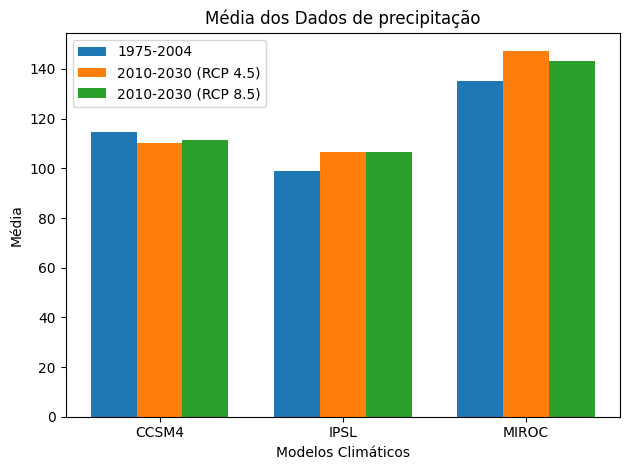

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
mean_1975_2004 = [mean_CCSM4, mean_ACCESS1_3, mean_HadGEM2_ES]
mean_2030_2050_rcp45 = [mean_CCSM4_rcp45, mean_ACCESS1_3_rcp45, mean_HadGEM2_ES_rcp45]
mean_2030_2050_rcp85 = [mean_CCSM4_rcp85, mean_ACCESS1_3_rcp85, mean_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, mean_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, mean_2030_2050_rcp85, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, mean_2030_2050_rcp45, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Média')
ax.set_title('Média dos Dados de precipitação')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
%%capture
#Retira a tendência linear dos dados.
notrend_CCSM4 = remove_linear_trend(CCSM4, 1975, 2004)
notrend_ACCESS1_3 = remove_linear_trend(ACCESS1_3, 1975, 2004)
notrend_HadGEM2_ES = remove_linear_trend(HadGEM2_ES, 1975, 2004)

notrend_CCSM4_rcp45 = remove_linear_trend(CCSM4_rcp45, 2030, 2050)
notrend_ACCESS1_3_rcp45 = remove_linear_trend(ACCESS1_3_rcp45, 2030, 2050)
notrend_HadGEM2_ES_rcp45 = remove_linear_trend(HadGEM2_ES_rcp45, 2030, 2050)

notrend_CCSM4_rcp85 = remove_linear_trend(CCSM4_rcp85, 2030, 2050)
notrend_ACCESS1_3_rcp85 = remove_linear_trend(ACCESS1_3_rcp85, 2030, 2050)
notrend_HadGEM2_ES_rcp85 = remove_linear_trend(HadGEM2_ES_rcp85, 2030, 2050)

In [ ]:
#Calcula a variância dos dados.
var_CCSM4 = calc_var(notrend_CCSM4, 1975, 2004)
var_ACCESS1_3 = calc_var(notrend_ACCESS1_3, 1975, 2004)
var_HadGEM2_ES = calc_var(notrend_HadGEM2_ES, 1975, 2004)

var_CCSM4_rcp45 = calc_var(notrend_CCSM4_rcp45, 2030, 2050)
var_ACCESS1_3_rcp45 = calc_var(notrend_ACCESS1_3_rcp45, 2030, 2050)
var_HadGEM2_ES_rcp45 = calc_var(notrend_HadGEM2_ES_rcp45, 2030, 2050)

var_CCSM4_rcp85 = calc_var(notrend_CCSM4_rcp85, 2030, 2050)
var_ACCESS1_3_rcp85 = calc_var(notrend_ACCESS1_3_rcp85, 2030, 2050)
var_HadGEM2_ES_rcp85 = calc_var(notrend_HadGEM2_ES_rcp85, 2030, 2050)

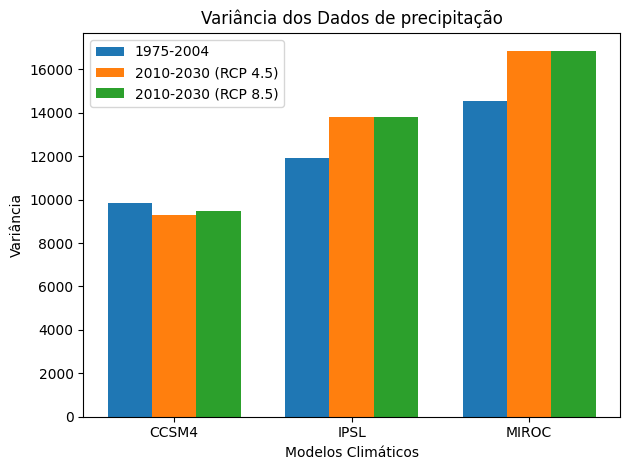

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
variances_1975_2004 = [var_CCSM4, var_ACCESS1_3, var_HadGEM2_ES]
variances_2030_2050_rcp45 = [var_CCSM4_rcp45, var_ACCESS1_3_rcp45, var_HadGEM2_ES_rcp85]
variances_2030_2050_rcp85 = [var_CCSM4_rcp85, var_ACCESS1_3_rcp85, var_HadGEM2_ES_rcp85]

# Nomes dos modelos
model_names = ['CCSM4', 'ACCESS1_3', 'HadGEM2_ES']

# Posições no eixo x para os grupos
x = np.arange(len(model_names))

# Largura das barras
width = 0.25  # Largura das barras

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotagem das barras para cada conjunto de dados
bars1 = ax.bar(x - width, variances_1975_2004, width, label='1975-2004')
bars2 = ax.bar(x, variances_2030_2050_rcp45, width, label='2010-2030 (RCP 4.5)')
bars3 = ax.bar(x + width, variances_2030_2050_rcp85, width, label='2010-2030 (RCP 8.5)')

# Adicionando rótulos, título e legendas
ax.set_xlabel('Modelos Climáticos')
ax.set_ylabel('Variância')
ax.set_title('Variância dos Dados de precipitação')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
#Máximas anuais
max_CCSM4 = max_temp_year(CCSM4)
max_ACCESS1_3 = max_temp_year(ACCESS1_3)
max_HadGEM2_ES = max_temp_year(HadGEM2_ES)

max_CCSM4_rcp45 = max_temp_year(CCSM4_rcp45).sel(year=slice("2030", "2050"))
max_ACCESS1_3_rcp45 = max_temp_year(ACCESS1_3_rcp45).sel(year=slice("2030", "2050"))
max_HadGEM2_ES_rcp45 = max_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2030", "2050"))

max_CCSM4_rcp85 = max_temp_year(CCSM4_rcp85).sel(year=slice("2030", "2050"))
max_ACCESS1_3_rcp85 = max_temp_year(ACCESS1_3_rcp85).sel(year=slice("2030", "2050"))
max_HadGEM2_ES_rcp85 = max_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2030", "2050"))

#Anomalias das máximas
mean_max_CCSM4 = max_CCSM4.mean(dim='year')
mean_max_ACCESS1_3 = max_ACCESS1_3.mean(dim='year')
mean_max_HadGEM2_ES = max_HadGEM2_ES.mean(dim='year')

anom_max_CCSM4_rcp45 = max_CCSM4_rcp45 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp45 = max_ACCESS1_3_rcp45 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp45 = max_HadGEM2_ES_rcp45 - mean_max_HadGEM2_ES

anom_max_CCSM4_rcp85 = max_CCSM4_rcp85 - mean_max_CCSM4
anom_max_ACCESS1_3_rcp85 = max_ACCESS1_3_rcp85 - mean_max_ACCESS1_3
anom_max_HadGEM2_ES_rcp85 = max_HadGEM2_ES_rcp85 - mean_max_HadGEM2_ES


#Minimas anuais
min_CCSM4 = min_temp_year(CCSM4)
min_ACCESS1_3 = min_temp_year(ACCESS1_3)
min_HadGEM2_ES = min_temp_year(HadGEM2_ES)

min_CCSM4_rcp45 = min_temp_year(CCSM4_rcp45).sel(year=slice("2030", "2050"))
min_ACCESS1_3_rcp45 = min_temp_year(ACCESS1_3_rcp45).sel(year=slice("2030", "2050"))
min_HadGEM2_ES_rcp45 = min_temp_year(HadGEM2_ES_rcp45).sel(year=slice("2030", "2050"))

min_CCSM4_rcp85 = min_temp_year(CCSM4_rcp85).sel(year=slice("2030", "2050"))
min_ACCESS1_3_rcp85 = min_temp_year(ACCESS1_3_rcp85).sel(year=slice("2030", "2050"))
min_HadGEM2_ES_rcp85 = min_temp_year(HadGEM2_ES_rcp85).sel(year=slice("2030", "2050"))

#Calculo das anomalias
mean_min_CCSM4 = min_CCSM4.mean(dim='year')
mean_min_ACCESS1_3 = min_ACCESS1_3.mean(dim='year')
mean_min_HadGEM2_ES = min_HadGEM2_ES.mean(dim='year')

anom_min_CCSM4_rcp45 = min_CCSM4_rcp45 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp45 = min_ACCESS1_3_rcp45 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp45 = min_HadGEM2_ES_rcp45 - mean_min_HadGEM2_ES

anom_min_CCSM4_rcp85 = min_CCSM4_rcp85 - mean_min_CCSM4
anom_min_ACCESS1_3_rcp85 = min_ACCESS1_3_rcp85 - mean_min_ACCESS1_3
anom_min_HadGEM2_ES_rcp85 = min_HadGEM2_ES_rcp85 - mean_min_HadGEM2_ES

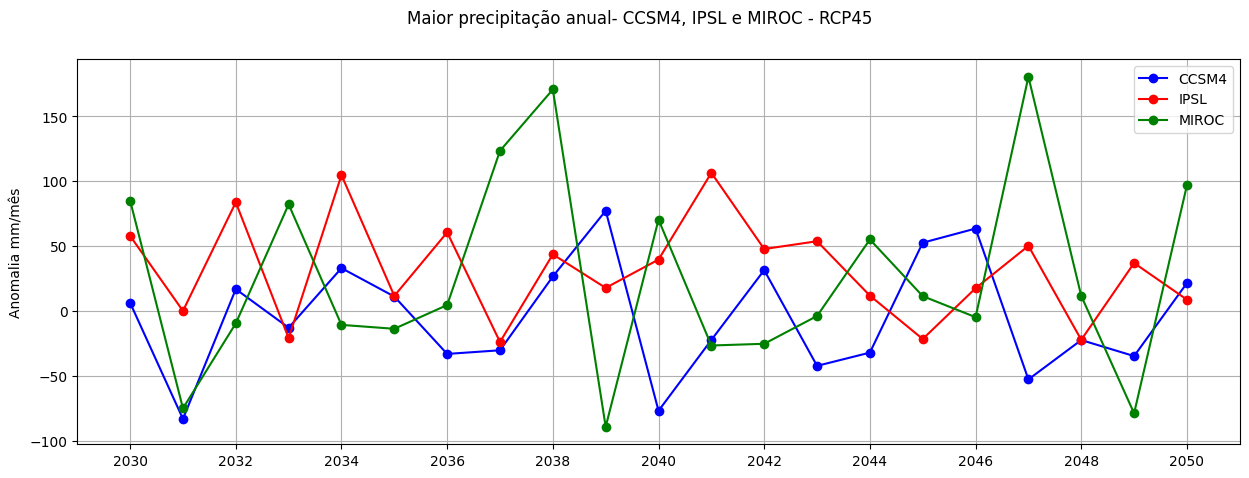

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp45.year, anom_max_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp45.year, anom_max_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp45.year, anom_max_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita o título do eixo y
ax.set_ylabel('Anomalia mm/mês')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

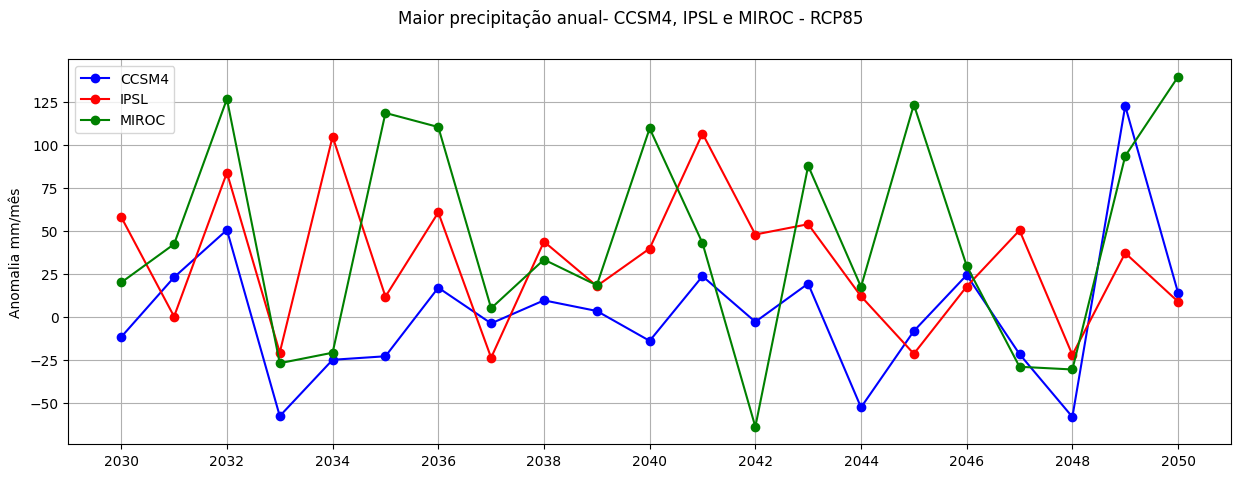

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_max_CCSM4_rcp85.year, anom_max_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_max_ACCESS1_3_rcp85.year, anom_max_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_max_HadGEM2_ES_rcp85.year, anom_max_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Maior precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP85')

#Ajeita o título do eixo y
ax.set_ylabel('Anomalia mm/mês')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(max_CCSM4_rcp85.year.min()), int(max_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

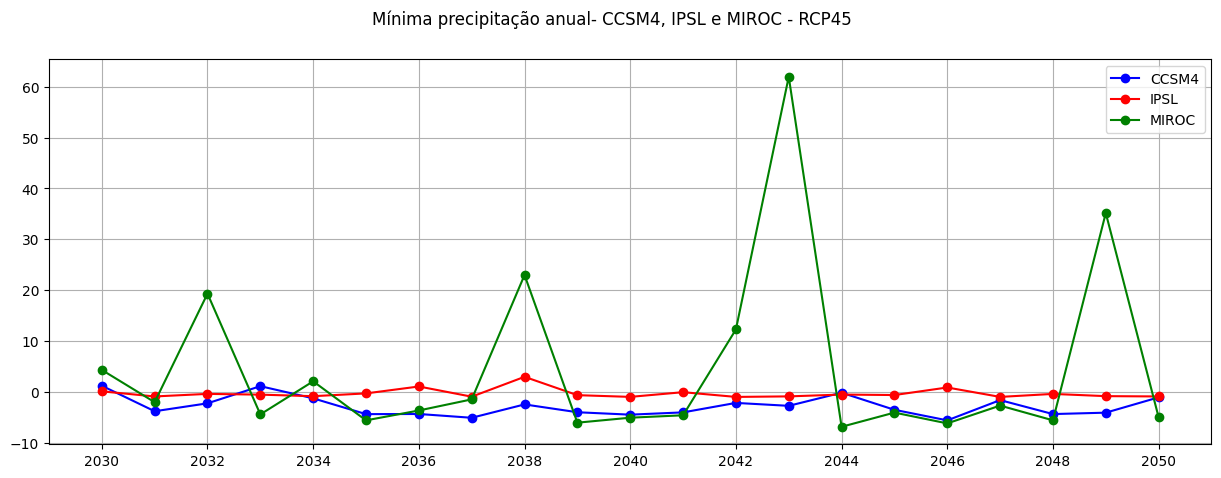

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp45.year, anom_min_CCSM4_rcp45, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp45.year, anom_min_ACCESS1_3_rcp45, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp45.year, anom_min_HadGEM2_ES_rcp45, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES - RCP45')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

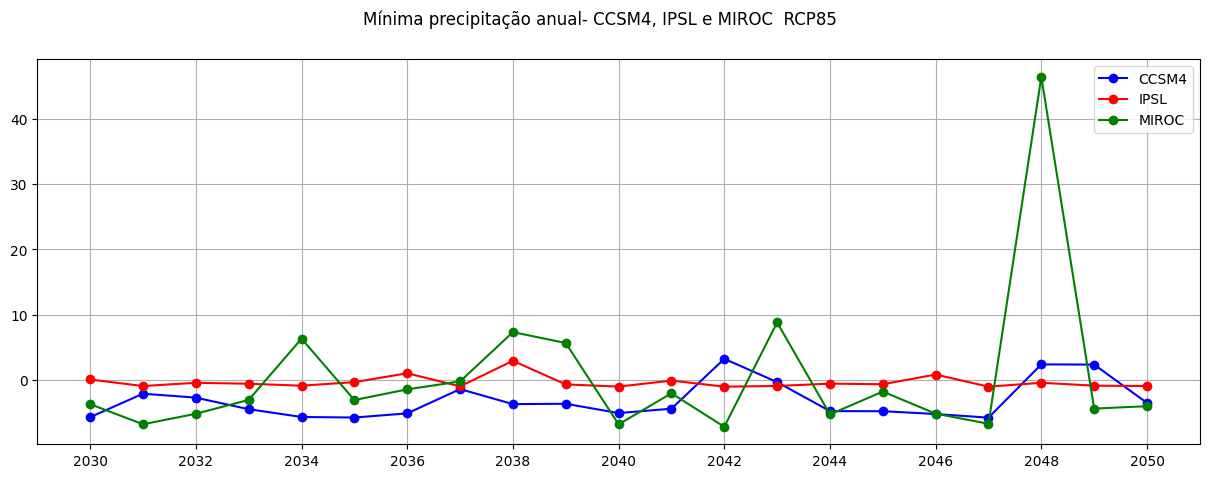

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Plota as anomalias dos três modelos em uma mesma figura
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))

# Plotagem das anomalias com bandas de erro para CCSM4
ax.plot(anom_min_CCSM4_rcp85.year, anom_min_CCSM4_rcp85, color='blue', label='CCSM4', marker='o')

# Plotagem das anomalias com bandas de erro para ACCESS1_3
ax.plot(anom_min_ACCESS1_3_rcp85.year, anom_min_ACCESS1_3_rcp85, color='red', label='ACCESS1_3', marker='o')

# Plotagem das anomalias com bandas de erro para HadGEM2_ES
ax.plot(anom_min_HadGEM2_ES_rcp85.year, anom_min_HadGEM2_ES_rcp85, color='green', label='HadGEM2_ES', marker='o')

# Adiciona um título geral para a figura
fig.suptitle('Mínima precipitação anual- CCSM4, ACCESS1_3 e HadGEM2_ES  RCP85')

#Ajeita os ticks do eixo x
ax.set_xticks(range(int(min_CCSM4_rcp85.year.min()), int(min_CCSM4_rcp85.year.max()) + 1, 2))  # Ajuste o intervalo conforme necessário

# Cria um grid
ax.grid()

# Adiciona uma legenda
ax.legend()

# Mostra a figura
plt.show()

##Análises mensais

In [ ]:
#Análises mensais

CCSM4_montly = CCSM4.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
ACCESS1_3_montly = ACCESS1_3.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
HadGEM2_ES_montly = HadGEM2_ES.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()

CCSM4_rcp45_montly = CCSM4_rcp45.sel(time=slice("2030", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
ACCESS1_3_rcp45_montly = ACCESS1_3_rcp45.sel(time=slice("2030", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
HadGEM2_ES_rcp45_montly = HadGEM2_ES_rcp45.sel(time=slice("2030", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()

CCSM4_rcp85_montly = CCSM4_rcp85.sel(time=slice("2030", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
ACCESS1_3_rcp85_montly = ACCESS1_3_rcp85.sel(time=slice("2030", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()
HadGEM2_ES_rcp85_montly = HadGEM2_ES_rcp85.sel(time=slice("2030", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.month').mean()

In [ ]:
anom_CCSM4_rcp45_montly = CCSM4_rcp45_montly - CCSM4_montly
anom_ACCESS1_3_rcp45_montly = ACCESS1_3_rcp45_montly - ACCESS1_3_montly
anom_HadGEM2_ES_rcp45_montly = HadGEM2_ES_rcp45_montly - HadGEM2_ES_montly

anom_CCSM4_rcp85_monthly = CCSM4_rcp85_montly - CCSM4_montly
anom_ACCESS1_3_rcp85_monthly = ACCESS1_3_rcp85_montly - ACCESS1_3_montly
anom_HadGEM2_ES_rcp85_monthly = HadGEM2_ES_rcp85_montly - HadGEM2_ES_montly

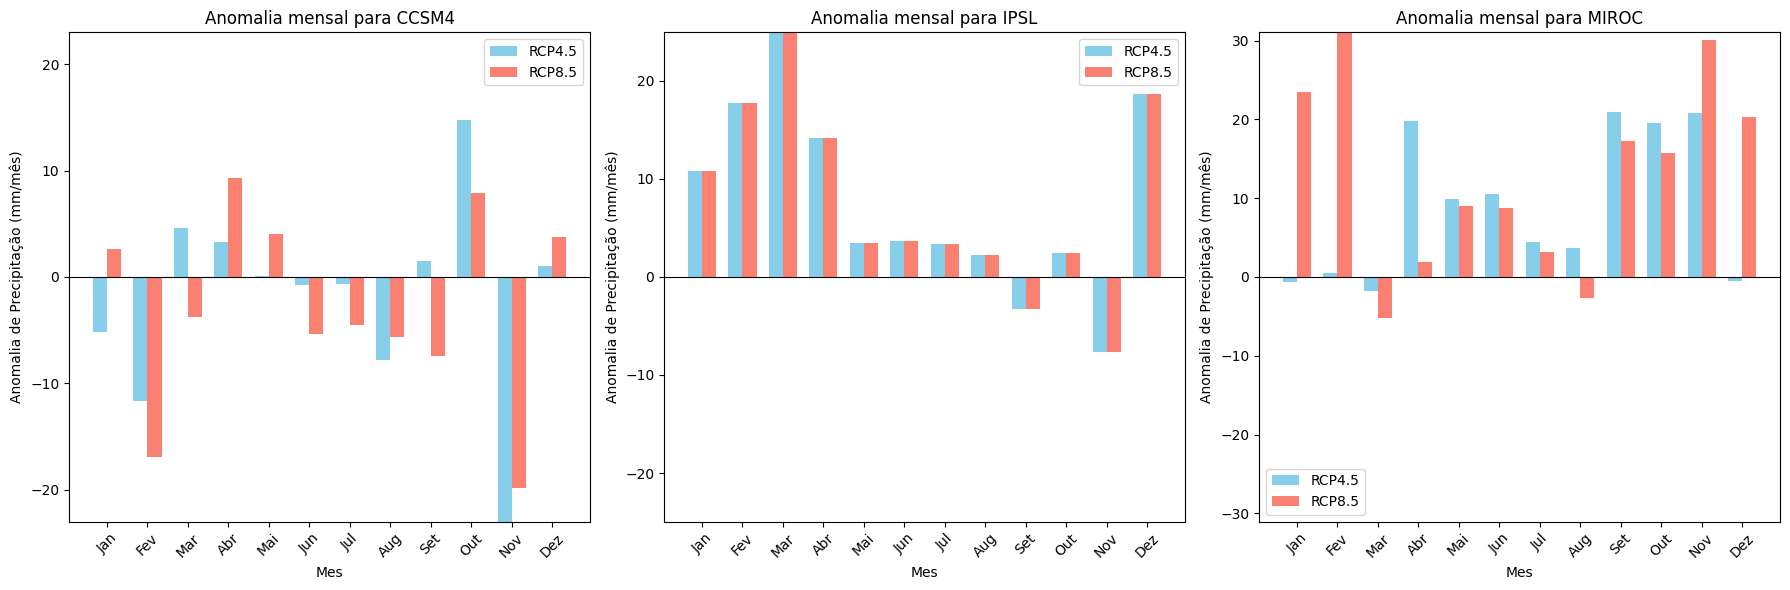

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extrai os dados mensais e os meses
months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Aug', 'Set', 'Out', 'Nov', 'Dez']
index = np.arange(len(months))
bar_width = 0.35

# Função para extrair os dados de anomalia
def extract_anomalies(anom_monthly):
    return anom_monthly.values

# Extrai os dados de anomalia para cada cenário e modelo
anom_CCSM4_rcp45 = extract_anomalies(anom_CCSM4_rcp45_montly)
anom_CCSM4_rcp85 = extract_anomalies(anom_CCSM4_rcp85_monthly)
anom_ACCESS1_3_rcp45 = extract_anomalies(anom_ACCESS1_3_rcp45_montly)
anom_ACCESS1_3_rcp85 = extract_anomalies(anom_ACCESS1_3_rcp85_monthly)
anom_HadGEM2_ES_rcp45 = extract_anomalies(anom_HadGEM2_ES_rcp45_montly)
anom_HadGEM2_ES_rcp85 = extract_anomalies(anom_HadGEM2_ES_rcp85_monthly)

# Cria uma figura e eixos para os gráficos de barras
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Dados e títulos para cada eixo
data = [
    (anom_CCSM4_rcp45, anom_CCSM4_rcp85, 'CCSM4'),
    (anom_ACCESS1_3_rcp45, anom_ACCESS1_3_rcp85, 'ACCESS1_3'),
    (anom_HadGEM2_ES_rcp45, anom_HadGEM2_ES_rcp85, 'HadGEM2_ES')
]

# Plotando cada conjunto de dados em seu respectivo eixo
for ax, (anom_rcp45, anom_rcp85, title) in zip(axes, data):
    # Plota o gráfico de barras para RCP4.5
    ax.bar(index - bar_width/2, anom_rcp45, bar_width, label='RCP4.5', color='skyblue')

    # Plota o gráfico de barras para RCP8.5
    ax.bar(index + bar_width/2, anom_rcp85, bar_width, label='RCP8.5', color='salmon')

    # Define os rótulos dos eixos
    ax.set_xlabel('Mes')
    ax.set_ylabel(f'Anomalia de Precipitação (mm/mês)')
    ax.set_title(f'Anomalia mensal para {title}')

    # Define os rótulos do eixo X como os nomes dos meses
    ax.set_xticks(index)
    ax.set_xticklabels(months, rotation=45)

    # Adiciona uma linha horizontal no eixo y = 0
    ax.axhline(0, color='black', linewidth=0.8)

    # Ajusta os limites do eixo Y para centralizar 0
    y_max = max(anom_rcp45.max(), anom_rcp85.max())
    y_min = min(anom_rcp45.min(), anom_rcp85.min())
    y_abs_max = max(abs(y_min), abs(y_max))
    ax.set_ylim(-y_abs_max, y_abs_max)

    # Adiciona a legenda
    ax.legend()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()


## Análise DJF

In [ ]:
# Importar a biblioteca necessária
import xarray as xr

# Análises mensais agrupadas por estação para cada ano
CCSM4_season_year = CCSM4.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
ACCESS1_3_season_year = ACCESS1_3.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
HadGEM2_ES_season_year = HadGEM2_ES.sel(time=slice("1974", "2005")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())

CCSM4_rcp45_season_year = CCSM4_rcp45.sel(time=slice("2007", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
ACCESS1_3_rcp45_season_year = ACCESS1_3_rcp45.sel(time=slice("2007", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
HadGEM2_ES_rcp45_season_year = HadGEM2_ES_rcp45.sel(time=slice("2007", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())

CCSM4_rcp85_season_year = CCSM4_rcp85.sel(time=slice("2007", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
ACCESS1_3_rcp85_season_year = ACCESS1_3_rcp85.sel(time=slice("2007", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())
HadGEM2_ES_rcp85_season_year = HadGEM2_ES_rcp85.sel(time=slice("2007", "2050")).mean(dim=['latitude', 'longitude']).groupby('time.year').apply(lambda x: x.groupby('time.season').sum())



In [ ]:
# Cria um dataset para cada modelo com as anomalias históricas e futuras (supondo que já tenha esses DataArrays)
CCSM4_season_rcp45 =  xr.merge([CCSM4_season_year, CCSM4_rcp45_season_year]).sel(year=slice("1980", "2050"))
CCSM4_season_rcp85 =  xr.merge([CCSM4_season_year, CCSM4_rcp85_season_year]).sel(year=slice("1980", "2050"))

ACCESS1_3_season_rcp45 =  xr.merge([ACCESS1_3_season_year, ACCESS1_3_rcp45_season_year]).sel(year=slice("1980", "2050"))
ACCESS1_3_season_rcp85 =  xr.merge([ACCESS1_3_season_year, ACCESS1_3_rcp85_season_year]).sel(year=slice("1980", "2050"))

HadGEM2_ES_season_rcp45 =  xr.merge([HadGEM2_ES_season_year, HadGEM2_ES_rcp45_season_year]).sel(year=slice("1980", "2050"))
HadGEM2_ES_season_rcp85 =  xr.merge([HadGEM2_ES_season_year, HadGEM2_ES_rcp85_season_year]).sel(year=slice("1980", "2050"))

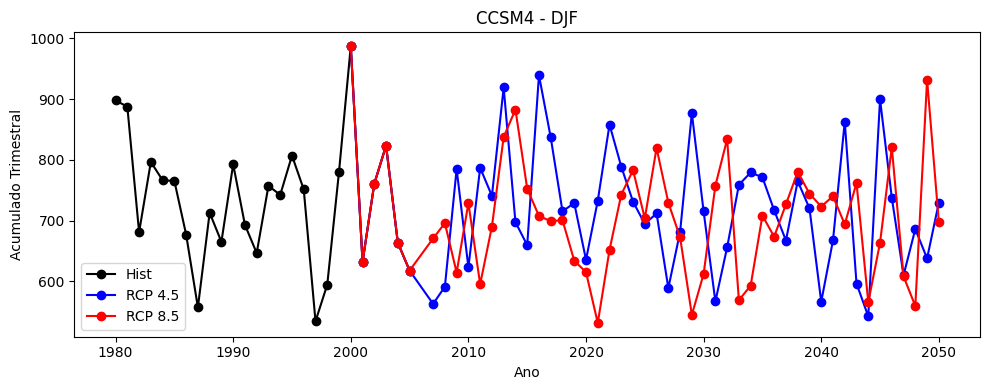

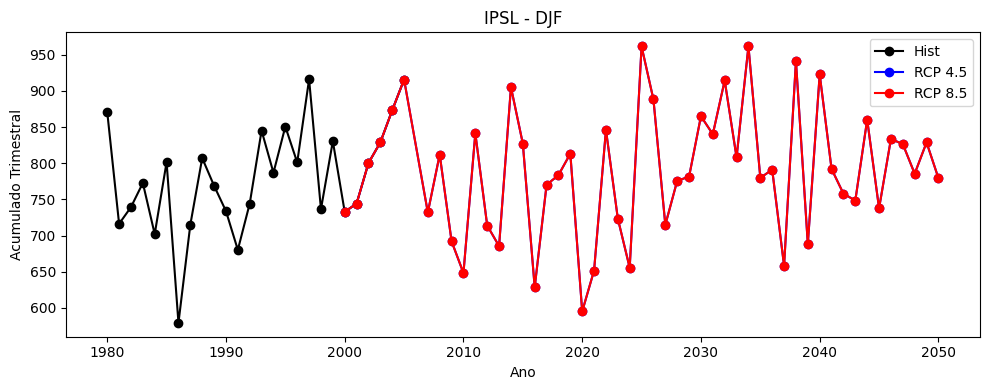

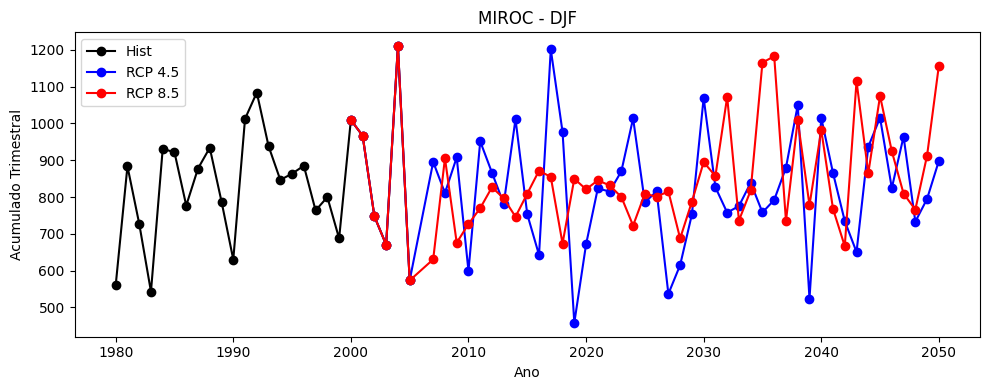

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Função para plotar os dados de um modelo para a estação DJF
def plot_model_djf(model_name, season_rcp45, season_rcp85):
    season = 'DJF'

    plt.figure(figsize=(10, 4))

    # Selecionar dados para a estação DJF
    season_hist = season_rcp45.sel(season=season, year=slice("1980", "2005"))
    season_rcp45_djf = season_rcp45.sel(season=season, year=slice("2000", "2050"))
    season_rcp85_djf = season_rcp85.sel(season=season, year=slice('2000', '2050'))

    # Plotar os dados]

    #Plota o histórico
    plt.plot(season_hist.year, season_hist.pr, label='Hist', color='black', marker='o')

    # Plot RCP 4.5
    plt.plot(season_rcp45_djf.year, season_rcp45_djf.pr, label='RCP 4.5', color='blue', marker='o')

    # Plot RCP 8.5
    plt.plot(season_rcp85_djf.year, season_rcp85_djf.pr, label='RCP 8.5', color='red', marker='o')

    plt.title(f'{model_name} - {season}')
    plt.legend()
    plt.xlabel('Ano')
    plt.ylabel('Acumulado Trimestral')

    plt.tight_layout()
    plt.show()

# Plotando para CCSM4
plot_model_djf('CCSM4', CCSM4_season_rcp45, CCSM4_season_rcp85)

# Plotando para ACCESS1_3
plot_model_djf('ACCESS1_3', ACCESS1_3_season_rcp45, ACCESS1_3_season_rcp85)

# Plotando para HadGEM2_ES
plot_model_djf('HadGEM2_ES', HadGEM2_ES_season_rcp45, HadGEM2_ES_season_rcp85)


## Impactos das mudanças:

Impactos na agricultura:
Perda maciça de produção agrícola e na pecuária

Aumento da temperatura do ar entre 1°C e 5,8°C no Centro-Oeste.

Período de estiagem mais seco e quente, com duração de até sete meses

Elevação do calor acima de 32°C nos períodos mais quentes do dia, afetando a fotossíntese e o crescimento das plantas.

Maior frequência de eventos extremos de seca e chuvas no Cerrado entre 2061 e 2080.

A Região Centro-Oeste é caracterizada por uma forte sazonalidade e marcado por uma estação seca com níveis e umidade muito baixos, o que favorece a ocorrência de queimadas e, consequentemente, de doenças respiratórias.

